In [110]:
import pandas as pd
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2016,1,1)
end = datetime.date.today()

stocks = ["AAPL", "MSFT", "ABEA"]

In [111]:
apple = web.DataReader("AAPL", "morningstar", start, end).reset_index(level=0, drop=True)

In [112]:
msft = web.DataReader("MSFT", "morningstar", start, end).reset_index(level=0, drop=True)

In [113]:
df = apple.join(msft, lsuffix="_apple", rsuffix="_msft")


In [59]:
from typing import Dict

def shift(colNames: Dict[str, str], df: pd.DataFrame) -> pd.DataFrame:
    for colName,shiftedColName in colNames.items():
        df[shiftedColName] = df[colName].shift(1)
    return df[ list(colNames.keys()) + list(colNames.values()) ]



In [114]:
ts = shift( {'Close_apple': 'Close_apple_t1', 'Close_msft': 'Close_msft_t1'}, df )
ts.dropna(inplace=True)

/home/resiemsual/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [181]:
n_train = 500

dataMatrix = ts.values

X = dataMatrix[:, :-2]
y = dataMatrix[:, -1]

#X = X.reshape((X.shape[0], 1, X.shape[1]))

train = dataMatrix[:n_train, :]
test = dataMatrix[n_train:, :]

train_X, train_Y = train[:, :-2 ], train[:, -1]
test_X, test_Y = test[:, :-2], test[:, -1]

#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [135]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

num_timesteps = train_X.shape[1]
num_features = train_X.shape[2]

model = Sequential()
model.add(LSTM(50, input_shape=(num_timesteps, num_features)))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')


fitted = model.fit(train_X, train_Y, epochs=5000, batch_size=32, validation_data=(test_X, test_Y))

Train on 500 samples, validate on 110 samples
Epoch 1/5000
500/500 [==============================] - 1s 2ms/step - loss: 62.8580 - val_loss: 90.4351
Epoch 2/5000
500/500 [==============================] - 0s 121us/step - loss: 62.5313 - val_loss: 90.2815
Epoch 3/5000
500/500 [==============================] - 0s 140us/step - loss: 62.2743 - val_loss: 89.7405
Epoch 4/5000
500/500 [==============================] - 0s 151us/step - loss: 61.8502 - val_loss: 89.6155
Epoch 5/5000
500/500 [==============================] - 0s 130us/step - loss: 61.7211 - val_loss: 89.4883
Epoch 6/5000
500/500 [==============================] - 0s 172us/step - loss: 61.5934 - val_loss: 89.3604
Epoch 7/5000
500/500 [==============================] - 0s 145us/step - loss: 61.4656 - val_loss: 89.2327
Epoch 8/5000
500/500 [==============================] - 0s 146us/step - loss: 61.3380 - val_loss: 89.1053
Epoch 9/5000
500/500 [==============================] - 0s 111us/step - loss: 61.2107 - val_loss: 88.9781
Ep

500/500 [==============================] - 0s 156us/step - loss: 52.6423 - val_loss: 80.4105
Epoch 78/5000
500/500 [==============================] - 0s 137us/step - loss: 52.5166 - val_loss: 80.2848
Epoch 79/5000
500/500 [==============================] - 0s 117us/step - loss: 52.3908 - val_loss: 80.1590
Epoch 80/5000
500/500 [==============================] - 0s 174us/step - loss: 52.2651 - val_loss: 80.0333
Epoch 81/5000
500/500 [==============================] - 0s 111us/step - loss: 52.1393 - val_loss: 79.9075
Epoch 82/5000
500/500 [==============================] - 0s 108us/step - loss: 52.0136 - val_loss: 79.7818
Epoch 83/5000
500/500 [==============================] - 0s 113us/step - loss: 51.8878 - val_loss: 79.6560
Epoch 84/5000
500/500 [==============================] - 0s 156us/step - loss: 51.7621 - val_loss: 79.5303
Epoch 85/5000
500/500 [==============================] - 0s 119us/step - loss: 51.6363 - val_loss: 79.4045
Epoch 86/5000
500/500 [============================

500/500 [==============================] - 0s 169us/step - loss: 43.0881 - val_loss: 70.8563
Epoch 154/5000
500/500 [==============================] - 0s 115us/step - loss: 42.9624 - val_loss: 70.7306
Epoch 155/5000
500/500 [==============================] - 0s 157us/step - loss: 42.8367 - val_loss: 70.6050
Epoch 156/5000
500/500 [==============================] - 0s 138us/step - loss: 42.7110 - val_loss: 70.4793
Epoch 157/5000
500/500 [==============================] - 0s 129us/step - loss: 42.5853 - val_loss: 70.3536
Epoch 158/5000
500/500 [==============================] - 0s 141us/step - loss: 42.4597 - val_loss: 70.2279
Epoch 159/5000
500/500 [==============================] - 0s 170us/step - loss: 42.3340 - val_loss: 70.1022
Epoch 160/5000
500/500 [==============================] - 0s 131us/step - loss: 42.2083 - val_loss: 69.9766
Epoch 161/5000
500/500 [==============================] - 0s 162us/step - loss: 42.0826 - val_loss: 69.8509
Epoch 162/5000
500/500 [===================

Epoch 229/5000
500/500 [==============================] - 0s 185us/step - loss: 33.5368 - val_loss: 61.3051
Epoch 230/5000
500/500 [==============================] - 0s 176us/step - loss: 33.4112 - val_loss: 61.1794
Epoch 231/5000
500/500 [==============================] - 0s 154us/step - loss: 33.2855 - val_loss: 61.0538
Epoch 232/5000
500/500 [==============================] - 0s 141us/step - loss: 33.1598 - val_loss: 60.9281
Epoch 233/5000
500/500 [==============================] - 0s 125us/step - loss: 33.0342 - val_loss: 60.8024
Epoch 234/5000
500/500 [==============================] - 0s 153us/step - loss: 32.9085 - val_loss: 60.6768
Epoch 235/5000
500/500 [==============================] - 0s 155us/step - loss: 32.7828 - val_loss: 60.5511
Epoch 236/5000
500/500 [==============================] - 0s 161us/step - loss: 32.6572 - val_loss: 60.4254
Epoch 237/5000
500/500 [==============================] - 0s 170us/step - loss: 32.5315 - val_loss: 60.2998
Epoch 238/5000
500/500 [====

Epoch 305/5000
500/500 [==============================] - 0s 143us/step - loss: 23.9866 - val_loss: 51.7548
Epoch 306/5000
500/500 [==============================] - 0s 137us/step - loss: 23.8609 - val_loss: 51.6292
Epoch 307/5000
500/500 [==============================] - 0s 149us/step - loss: 23.7352 - val_loss: 51.5035
Epoch 308/5000
500/500 [==============================] - 0s 158us/step - loss: 23.6096 - val_loss: 51.3779
Epoch 309/5000
500/500 [==============================] - 0s 115us/step - loss: 23.4839 - val_loss: 51.2522
Epoch 310/5000
500/500 [==============================] - 0s 196us/step - loss: 23.3583 - val_loss: 51.1265
Epoch 311/5000
500/500 [==============================] - 0s 158us/step - loss: 23.2326 - val_loss: 51.0009
Epoch 312/5000
500/500 [==============================] - 0s 159us/step - loss: 23.1069 - val_loss: 50.8752
Epoch 313/5000
500/500 [==============================] - 0s 149us/step - loss: 22.9813 - val_loss: 50.7496
Epoch 314/5000
500/500 [====

Epoch 381/5000
500/500 [==============================] - 0s 201us/step - loss: 14.4364 - val_loss: 42.2046
Epoch 382/5000
500/500 [==============================] - 0s 152us/step - loss: 14.3107 - val_loss: 42.0790
Epoch 383/5000
500/500 [==============================] - 0s 170us/step - loss: 14.1853 - val_loss: 41.9537
Epoch 384/5000
500/500 [==============================] - 0s 160us/step - loss: 14.0607 - val_loss: 41.8283
Epoch 385/5000
500/500 [==============================] - 0s 136us/step - loss: 13.9358 - val_loss: 41.7032
Epoch 386/5000
500/500 [==============================] - 0s 114us/step - loss: 13.8112 - val_loss: 41.5780
Epoch 387/5000
500/500 [==============================] - 0s 135us/step - loss: 13.6864 - val_loss: 41.4528
Epoch 388/5000
500/500 [==============================] - 0s 133us/step - loss: 13.5618 - val_loss: 41.3276
Epoch 389/5000
500/500 [==============================] - 0s 173us/step - loss: 13.4372 - val_loss: 41.2023
Epoch 390/5000
500/500 [====

500/500 [==============================] - 0s 154us/step - loss: 9.0707 - val_loss: 34.9948
Epoch 458/5000
500/500 [==============================] - 0s 167us/step - loss: 9.0384 - val_loss: 34.9211
Epoch 459/5000
500/500 [==============================] - 0s 146us/step - loss: 9.0056 - val_loss: 34.8501
Epoch 460/5000
500/500 [==============================] - 0s 144us/step - loss: 8.9744 - val_loss: 34.7773
Epoch 461/5000
500/500 [==============================] - 0s 159us/step - loss: 8.9423 - val_loss: 34.7064
Epoch 462/5000
500/500 [==============================] - 0s 163us/step - loss: 8.9122 - val_loss: 34.6333
Epoch 463/5000
500/500 [==============================] - 0s 143us/step - loss: 8.8805 - val_loss: 34.5663
Epoch 464/5000
500/500 [==============================] - 0s 158us/step - loss: 8.8512 - val_loss: 34.4953
Epoch 465/5000
500/500 [==============================] - 0s 181us/step - loss: 8.8214 - val_loss: 34.4241
Epoch 466/5000
500/500 [============================

500/500 [==============================] - 0s 164us/step - loss: 7.9715 - val_loss: 31.2760
Epoch 534/5000
500/500 [==============================] - 0s 170us/step - loss: 7.9670 - val_loss: 31.2416
Epoch 535/5000
500/500 [==============================] - 0s 145us/step - loss: 7.9625 - val_loss: 31.2103
Epoch 536/5000
500/500 [==============================] - 0s 178us/step - loss: 7.9585 - val_loss: 31.1753
Epoch 537/5000
500/500 [==============================] - 0s 160us/step - loss: 7.9547 - val_loss: 31.1363
Epoch 538/5000
500/500 [==============================] - 0s 151us/step - loss: 7.9496 - val_loss: 31.1069
Epoch 539/5000
500/500 [==============================] - 0s 168us/step - loss: 7.9455 - val_loss: 31.0708
Epoch 540/5000
500/500 [==============================] - 0s 139us/step - loss: 7.9406 - val_loss: 31.0439
Epoch 541/5000
500/500 [==============================] - 0s 158us/step - loss: 7.9368 - val_loss: 31.0092
Epoch 542/5000
500/500 [============================

500/500 [==============================] - 0s 167us/step - loss: 6.1842 - val_loss: 28.7050
Epoch 610/5000
500/500 [==============================] - 0s 181us/step - loss: 6.1526 - val_loss: 28.5619
Epoch 611/5000
500/500 [==============================] - 0s 163us/step - loss: 6.1698 - val_loss: 27.9695
Epoch 612/5000
500/500 [==============================] - 0s 168us/step - loss: 6.1324 - val_loss: 27.9731
Epoch 613/5000
500/500 [==============================] - 0s 179us/step - loss: 6.1188 - val_loss: 28.5715
Epoch 614/5000
500/500 [==============================] - 0s 140us/step - loss: 6.0238 - val_loss: 28.2632
Epoch 615/5000
500/500 [==============================] - 0s 158us/step - loss: 5.9915 - val_loss: 28.5674
Epoch 616/5000
500/500 [==============================] - 0s 131us/step - loss: 5.9536 - val_loss: 28.1692
Epoch 617/5000
500/500 [==============================] - 0s 138us/step - loss: 6.0543 - val_loss: 27.6011
Epoch 618/5000
500/500 [============================

500/500 [==============================] - 0s 171us/step - loss: 4.8080 - val_loss: 26.8900
Epoch 686/5000
500/500 [==============================] - 0s 190us/step - loss: 4.8721 - val_loss: 25.8835
Epoch 687/5000
500/500 [==============================] - 0s 159us/step - loss: 4.8096 - val_loss: 24.8190
Epoch 688/5000
500/500 [==============================] - 0s 127us/step - loss: 4.7893 - val_loss: 25.7238
Epoch 689/5000
500/500 [==============================] - 0s 117us/step - loss: 4.7468 - val_loss: 25.8012
Epoch 690/5000
500/500 [==============================] - 0s 164us/step - loss: 4.7367 - val_loss: 25.8460
Epoch 691/5000
500/500 [==============================] - 0s 117us/step - loss: 4.7465 - val_loss: 26.4143
Epoch 692/5000
500/500 [==============================] - 0s 124us/step - loss: 4.7169 - val_loss: 25.0287
Epoch 693/5000
500/500 [==============================] - 0s 167us/step - loss: 4.7070 - val_loss: 27.7845
Epoch 694/5000
500/500 [============================

500/500 [==============================] - 0s 201us/step - loss: 4.3806 - val_loss: 24.4493
Epoch 762/5000
500/500 [==============================] - 0s 122us/step - loss: 4.3574 - val_loss: 25.1718
Epoch 763/5000
500/500 [==============================] - 0s 162us/step - loss: 4.3578 - val_loss: 24.0715
Epoch 764/5000
500/500 [==============================] - 0s 135us/step - loss: 4.4034 - val_loss: 22.5848
Epoch 765/5000
500/500 [==============================] - 0s 142us/step - loss: 4.3783 - val_loss: 25.3415
Epoch 766/5000
500/500 [==============================] - 0s 180us/step - loss: 4.3417 - val_loss: 25.1614
Epoch 767/5000
500/500 [==============================] - 0s 179us/step - loss: 4.3188 - val_loss: 24.6984
Epoch 768/5000
500/500 [==============================] - 0s 152us/step - loss: 4.3150 - val_loss: 24.4460
Epoch 769/5000
500/500 [==============================] - 0s 158us/step - loss: 4.3039 - val_loss: 25.9512
Epoch 770/5000
500/500 [============================

500/500 [==============================] - 0s 183us/step - loss: 4.0189 - val_loss: 22.5324
Epoch 838/5000
500/500 [==============================] - 0s 162us/step - loss: 3.9806 - val_loss: 22.4339
Epoch 839/5000
500/500 [==============================] - 0s 183us/step - loss: 3.9832 - val_loss: 21.8723
Epoch 840/5000
500/500 [==============================] - 0s 120us/step - loss: 4.0095 - val_loss: 21.8486
Epoch 841/5000
500/500 [==============================] - 0s 106us/step - loss: 4.0018 - val_loss: 21.5715
Epoch 842/5000
500/500 [==============================] - 0s 198us/step - loss: 4.0192 - val_loss: 21.5466
Epoch 843/5000
500/500 [==============================] - 0s 150us/step - loss: 3.9648 - val_loss: 23.2764
Epoch 844/5000
500/500 [==============================] - 0s 179us/step - loss: 3.9323 - val_loss: 21.8377
Epoch 845/5000
500/500 [==============================] - 0s 129us/step - loss: 3.9740 - val_loss: 22.0009
Epoch 846/5000
500/500 [============================

500/500 [==============================] - 0s 141us/step - loss: 3.5199 - val_loss: 20.4356
Epoch 914/5000
500/500 [==============================] - 0s 139us/step - loss: 3.5446 - val_loss: 20.6528
Epoch 915/5000
500/500 [==============================] - 0s 129us/step - loss: 3.5256 - val_loss: 20.7418
Epoch 916/5000
500/500 [==============================] - 0s 131us/step - loss: 3.5613 - val_loss: 19.9953
Epoch 917/5000
500/500 [==============================] - 0s 141us/step - loss: 3.5428 - val_loss: 20.4126
Epoch 918/5000
500/500 [==============================] - 0s 138us/step - loss: 3.4904 - val_loss: 20.0237
Epoch 919/5000
500/500 [==============================] - 0s 131us/step - loss: 3.4625 - val_loss: 20.9407
Epoch 920/5000
500/500 [==============================] - 0s 114us/step - loss: 3.4610 - val_loss: 20.4394
Epoch 921/5000
500/500 [==============================] - 0s 152us/step - loss: 3.4514 - val_loss: 20.5570
Epoch 922/5000
500/500 [============================

500/500 [==============================] - 0s 169us/step - loss: 2.9656 - val_loss: 19.2446
Epoch 990/5000
500/500 [==============================] - 0s 158us/step - loss: 2.9186 - val_loss: 19.0786
Epoch 991/5000
500/500 [==============================] - 0s 175us/step - loss: 2.9186 - val_loss: 19.0228
Epoch 992/5000
500/500 [==============================] - 0s 159us/step - loss: 2.9026 - val_loss: 19.1162
Epoch 993/5000
500/500 [==============================] - 0s 148us/step - loss: 2.9146 - val_loss: 19.1651
Epoch 994/5000
500/500 [==============================] - 0s 139us/step - loss: 2.9234 - val_loss: 18.9336
Epoch 995/5000
500/500 [==============================] - 0s 135us/step - loss: 2.8818 - val_loss: 18.8123
Epoch 996/5000
500/500 [==============================] - 0s 137us/step - loss: 3.0092 - val_loss: 19.4413
Epoch 997/5000
500/500 [==============================] - 0s 114us/step - loss: 2.8957 - val_loss: 19.2497
Epoch 998/5000
500/500 [============================

500/500 [==============================] - 0s 186us/step - loss: 2.4042 - val_loss: 18.0310
Epoch 1066/5000
500/500 [==============================] - 0s 110us/step - loss: 2.4178 - val_loss: 18.1442
Epoch 1067/5000
500/500 [==============================] - 0s 157us/step - loss: 2.3696 - val_loss: 18.1137
Epoch 1068/5000
500/500 [==============================] - 0s 169us/step - loss: 2.3494 - val_loss: 18.0306
Epoch 1069/5000
500/500 [==============================] - 0s 127us/step - loss: 2.3934 - val_loss: 18.0527
Epoch 1070/5000
500/500 [==============================] - 0s 101us/step - loss: 2.3666 - val_loss: 18.1621
Epoch 1071/5000
500/500 [==============================] - 0s 181us/step - loss: 2.3464 - val_loss: 17.9991
Epoch 1072/5000
500/500 [==============================] - 0s 128us/step - loss: 2.3357 - val_loss: 18.0895
Epoch 1073/5000
500/500 [==============================] - 0s 125us/step - loss: 2.3725 - val_loss: 17.9379
Epoch 1074/5000
500/500 [===================

500/500 [==============================] - 0s 163us/step - loss: 1.8874 - val_loss: 17.0078
Epoch 1142/5000
500/500 [==============================] - 0s 161us/step - loss: 1.8937 - val_loss: 16.9763
Epoch 1143/5000
500/500 [==============================] - 0s 146us/step - loss: 1.9791 - val_loss: 16.8768
Epoch 1144/5000
500/500 [==============================] - 0s 195us/step - loss: 1.9139 - val_loss: 16.9240
Epoch 1145/5000
500/500 [==============================] - 0s 114us/step - loss: 1.8948 - val_loss: 16.9329
Epoch 1146/5000
500/500 [==============================] - 0s 160us/step - loss: 1.8760 - val_loss: 16.8897
Epoch 1147/5000
500/500 [==============================] - 0s 142us/step - loss: 1.8420 - val_loss: 16.8943
Epoch 1148/5000
500/500 [==============================] - 0s 150us/step - loss: 1.8475 - val_loss: 16.9289
Epoch 1149/5000
500/500 [==============================] - 0s 112us/step - loss: 1.8362 - val_loss: 16.8563
Epoch 1150/5000
500/500 [===================

500/500 [==============================] - 0s 174us/step - loss: 1.5643 - val_loss: 15.8533
Epoch 1218/5000
500/500 [==============================] - 0s 155us/step - loss: 1.5766 - val_loss: 15.8215
Epoch 1219/5000
500/500 [==============================] - 0s 124us/step - loss: 1.6051 - val_loss: 15.8080
Epoch 1220/5000
500/500 [==============================] - 0s 122us/step - loss: 1.5541 - val_loss: 15.8074
Epoch 1221/5000
500/500 [==============================] - 0s 122us/step - loss: 1.5558 - val_loss: 15.7816
Epoch 1222/5000
500/500 [==============================] - 0s 165us/step - loss: 1.6377 - val_loss: 15.7826
Epoch 1223/5000
500/500 [==============================] - 0s 114us/step - loss: 1.5855 - val_loss: 15.7349
Epoch 1224/5000
500/500 [==============================] - 0s 164us/step - loss: 1.5272 - val_loss: 15.8196
Epoch 1225/5000
500/500 [==============================] - 0s 139us/step - loss: 1.5077 - val_loss: 15.7598
Epoch 1226/5000
500/500 [===================

500/500 [==============================] - 0s 124us/step - loss: 1.3513 - val_loss: 14.7248
Epoch 1294/5000
500/500 [==============================] - 0s 140us/step - loss: 1.3333 - val_loss: 14.7125
Epoch 1295/5000
500/500 [==============================] - 0s 122us/step - loss: 1.3514 - val_loss: 14.6743
Epoch 1296/5000
500/500 [==============================] - 0s 144us/step - loss: 1.2776 - val_loss: 14.7350
Epoch 1297/5000
500/500 [==============================] - 0s 166us/step - loss: 1.3915 - val_loss: 14.7122
Epoch 1298/5000
500/500 [==============================] - 0s 149us/step - loss: 1.3093 - val_loss: 14.7301
Epoch 1299/5000
500/500 [==============================] - 0s 140us/step - loss: 1.2751 - val_loss: 14.6378
Epoch 1300/5000
500/500 [==============================] - 0s 171us/step - loss: 1.2794 - val_loss: 14.5625
Epoch 1301/5000
500/500 [==============================] - 0s 122us/step - loss: 1.3441 - val_loss: 14.5853
Epoch 1302/5000
500/500 [===================

500/500 [==============================] - 0s 180us/step - loss: 1.1545 - val_loss: 13.5110
Epoch 1370/5000
500/500 [==============================] - 0s 222us/step - loss: 1.1688 - val_loss: 13.6364
Epoch 1371/5000
500/500 [==============================] - 0s 143us/step - loss: 1.2420 - val_loss: 13.5794
Epoch 1372/5000
500/500 [==============================] - 0s 176us/step - loss: 1.1461 - val_loss: 13.5845
Epoch 1373/5000
500/500 [==============================] - 0s 158us/step - loss: 1.1521 - val_loss: 13.5159
Epoch 1374/5000
500/500 [==============================] - 0s 167us/step - loss: 1.1329 - val_loss: 13.5130
Epoch 1375/5000
500/500 [==============================] - 0s 158us/step - loss: 1.1199 - val_loss: 13.4672
Epoch 1376/5000
500/500 [==============================] - 0s 112us/step - loss: 1.1103 - val_loss: 13.4695
Epoch 1377/5000
500/500 [==============================] - 0s 113us/step - loss: 1.1125 - val_loss: 13.3867
Epoch 1378/5000
500/500 [===================

500/500 [==============================] - 0s 116us/step - loss: 1.0694 - val_loss: 12.6788
Epoch 1446/5000
500/500 [==============================] - 0s 116us/step - loss: 1.1154 - val_loss: 12.7017
Epoch 1447/5000
500/500 [==============================] - 0s 132us/step - loss: 1.1053 - val_loss: 12.6600
Epoch 1448/5000
500/500 [==============================] - 0s 162us/step - loss: 1.0597 - val_loss: 12.6756
Epoch 1449/5000
500/500 [==============================] - 0s 144us/step - loss: 1.0571 - val_loss: 12.6853
Epoch 1450/5000
500/500 [==============================] - 0s 142us/step - loss: 1.0434 - val_loss: 12.6420
Epoch 1451/5000
500/500 [==============================] - 0s 143us/step - loss: 1.0347 - val_loss: 12.6359
Epoch 1452/5000
500/500 [==============================] - 0s 183us/step - loss: 1.0837 - val_loss: 12.6015
Epoch 1453/5000
500/500 [==============================] - 0s 162us/step - loss: 1.1276 - val_loss: 12.5532
Epoch 1454/5000
500/500 [===================

500/500 [==============================] - 0s 122us/step - loss: 1.0371 - val_loss: 12.1535
Epoch 1522/5000
500/500 [==============================] - 0s 117us/step - loss: 1.1015 - val_loss: 12.0563
Epoch 1523/5000
500/500 [==============================] - 0s 177us/step - loss: 1.0197 - val_loss: 12.0582
Epoch 1524/5000
500/500 [==============================] - 0s 148us/step - loss: 1.1187 - val_loss: 11.9861
Epoch 1525/5000
500/500 [==============================] - 0s 134us/step - loss: 1.0814 - val_loss: 12.1466
Epoch 1526/5000
500/500 [==============================] - 0s 106us/step - loss: 1.1469 - val_loss: 12.1298
Epoch 1527/5000
500/500 [==============================] - 0s 124us/step - loss: 1.0545 - val_loss: 12.0318
Epoch 1528/5000
500/500 [==============================] - 0s 159us/step - loss: 1.0224 - val_loss: 12.0544
Epoch 1529/5000
500/500 [==============================] - 0s 173us/step - loss: 1.0284 - val_loss: 12.0300
Epoch 1530/5000
500/500 [===================

500/500 [==============================] - 0s 120us/step - loss: 1.0819 - val_loss: 11.7492
Epoch 1598/5000
500/500 [==============================] - 0s 137us/step - loss: 1.0831 - val_loss: 11.7279
Epoch 1599/5000
500/500 [==============================] - 0s 105us/step - loss: 1.0120 - val_loss: 11.7224
Epoch 1600/5000
500/500 [==============================] - 0s 122us/step - loss: 1.0046 - val_loss: 11.7276
Epoch 1601/5000
500/500 [==============================] - 0s 128us/step - loss: 1.0611 - val_loss: 11.7668
Epoch 1602/5000
500/500 [==============================] - 0s 165us/step - loss: 1.0469 - val_loss: 11.7685
Epoch 1603/5000
500/500 [==============================] - 0s 165us/step - loss: 1.0797 - val_loss: 11.6897
Epoch 1604/5000
500/500 [==============================] - 0s 151us/step - loss: 1.0738 - val_loss: 11.6145
Epoch 1605/5000
500/500 [==============================] - 0s 185us/step - loss: 1.1119 - val_loss: 11.6052
Epoch 1606/5000
500/500 [===================

500/500 [==============================] - 0s 117us/step - loss: 1.1372 - val_loss: 11.4219
Epoch 1674/5000
500/500 [==============================] - 0s 137us/step - loss: 1.0422 - val_loss: 11.4385
Epoch 1675/5000
500/500 [==============================] - 0s 113us/step - loss: 1.0289 - val_loss: 11.3892
Epoch 1676/5000
500/500 [==============================] - 0s 148us/step - loss: 1.0120 - val_loss: 11.4797
Epoch 1677/5000
500/500 [==============================] - 0s 97us/step - loss: 1.0979 - val_loss: 11.3767
Epoch 1678/5000
500/500 [==============================] - 0s 175us/step - loss: 1.0648 - val_loss: 11.4466
Epoch 1679/5000
500/500 [==============================] - 0s 129us/step - loss: 1.0335 - val_loss: 11.3876
Epoch 1680/5000
500/500 [==============================] - 0s 190us/step - loss: 1.0649 - val_loss: 11.4448
Epoch 1681/5000
500/500 [==============================] - 0s 142us/step - loss: 1.0332 - val_loss: 11.3605
Epoch 1682/5000
500/500 [====================

500/500 [==============================] - 0s 146us/step - loss: 1.0031 - val_loss: 11.1752
Epoch 1750/5000
500/500 [==============================] - 0s 203us/step - loss: 1.0317 - val_loss: 11.1518
Epoch 1751/5000
500/500 [==============================] - 0s 166us/step - loss: 1.0765 - val_loss: 11.3175
Epoch 1752/5000
500/500 [==============================] - 0s 132us/step - loss: 1.0604 - val_loss: 11.2530
Epoch 1753/5000
500/500 [==============================] - 0s 168us/step - loss: 1.0288 - val_loss: 11.1968
Epoch 1754/5000
500/500 [==============================] - 0s 126us/step - loss: 1.0892 - val_loss: 11.3457
Epoch 1755/5000
500/500 [==============================] - 0s 117us/step - loss: 1.0917 - val_loss: 11.3560
Epoch 1756/5000
500/500 [==============================] - 0s 144us/step - loss: 1.0373 - val_loss: 11.2402
Epoch 1757/5000
500/500 [==============================] - 0s 137us/step - loss: 1.0285 - val_loss: 11.1832
Epoch 1758/5000
500/500 [===================

500/500 [==============================] - 0s 153us/step - loss: 1.0564 - val_loss: 11.1311
Epoch 1826/5000
500/500 [==============================] - 0s 174us/step - loss: 1.0393 - val_loss: 11.0902
Epoch 1827/5000
500/500 [==============================] - 0s 119us/step - loss: 1.0196 - val_loss: 11.1053
Epoch 1828/5000
500/500 [==============================] - 0s 191us/step - loss: 1.0246 - val_loss: 11.1897
Epoch 1829/5000
500/500 [==============================] - 0s 161us/step - loss: 1.1626 - val_loss: 11.2184
Epoch 1830/5000
500/500 [==============================] - 0s 181us/step - loss: 1.1281 - val_loss: 11.1457
Epoch 1831/5000
500/500 [==============================] - 0s 159us/step - loss: 1.0298 - val_loss: 11.2265
Epoch 1832/5000
500/500 [==============================] - 0s 167us/step - loss: 1.0447 - val_loss: 11.1255
Epoch 1833/5000
500/500 [==============================] - 0s 126us/step - loss: 0.9940 - val_loss: 11.1183
Epoch 1834/5000
500/500 [===================

500/500 [==============================] - 0s 173us/step - loss: 1.0241 - val_loss: 11.0465
Epoch 1902/5000
500/500 [==============================] - 0s 128us/step - loss: 0.9961 - val_loss: 10.9944
Epoch 1903/5000
500/500 [==============================] - 0s 170us/step - loss: 1.0356 - val_loss: 11.0562
Epoch 1904/5000
500/500 [==============================] - 0s 136us/step - loss: 1.0213 - val_loss: 10.9955
Epoch 1905/5000
500/500 [==============================] - 0s 187us/step - loss: 1.0217 - val_loss: 11.1047
Epoch 1906/5000
500/500 [==============================] - 0s 175us/step - loss: 1.0399 - val_loss: 11.1793
Epoch 1907/5000
500/500 [==============================] - 0s 164us/step - loss: 1.1294 - val_loss: 10.9961
Epoch 1908/5000
500/500 [==============================] - 0s 148us/step - loss: 1.0361 - val_loss: 10.9773
Epoch 1909/5000
500/500 [==============================] - 0s 154us/step - loss: 1.0614 - val_loss: 10.9743
Epoch 1910/5000
500/500 [===================

500/500 [==============================] - 0s 122us/step - loss: 1.0017 - val_loss: 10.9739
Epoch 1978/5000
500/500 [==============================] - 0s 145us/step - loss: 1.0944 - val_loss: 10.8504
Epoch 1979/5000
500/500 [==============================] - 0s 133us/step - loss: 1.0741 - val_loss: 10.9025
Epoch 1980/5000
500/500 [==============================] - 0s 188us/step - loss: 1.1288 - val_loss: 10.8543
Epoch 1981/5000
500/500 [==============================] - 0s 169us/step - loss: 1.2174 - val_loss: 10.8456
Epoch 1982/5000
500/500 [==============================] - 0s 112us/step - loss: 1.0548 - val_loss: 10.9145
Epoch 1983/5000
500/500 [==============================] - 0s 173us/step - loss: 1.0640 - val_loss: 10.9415
Epoch 1984/5000
500/500 [==============================] - 0s 158us/step - loss: 1.0199 - val_loss: 11.0617
Epoch 1985/5000
500/500 [==============================] - 0s 166us/step - loss: 1.0060 - val_loss: 11.0127
Epoch 1986/5000
500/500 [===================

500/500 [==============================] - 0s 158us/step - loss: 1.0248 - val_loss: 10.9279
Epoch 2054/5000
500/500 [==============================] - 0s 155us/step - loss: 0.9962 - val_loss: 10.9539
Epoch 2055/5000
500/500 [==============================] - 0s 147us/step - loss: 1.0097 - val_loss: 10.9173
Epoch 2056/5000
500/500 [==============================] - 0s 138us/step - loss: 1.0697 - val_loss: 10.8215
Epoch 2057/5000
500/500 [==============================] - 0s 173us/step - loss: 0.9905 - val_loss: 10.9527
Epoch 2058/5000
500/500 [==============================] - 0s 169us/step - loss: 1.0494 - val_loss: 10.8630
Epoch 2059/5000
500/500 [==============================] - 0s 182us/step - loss: 1.0393 - val_loss: 10.8743
Epoch 2060/5000
500/500 [==============================] - 0s 124us/step - loss: 0.9855 - val_loss: 10.8769
Epoch 2061/5000
500/500 [==============================] - 0s 133us/step - loss: 1.0058 - val_loss: 10.8679
Epoch 2062/5000
500/500 [===================

500/500 [==============================] - 0s 109us/step - loss: 0.9897 - val_loss: 10.8466
Epoch 2130/5000
500/500 [==============================] - 0s 153us/step - loss: 0.9601 - val_loss: 10.8888
Epoch 2131/5000
500/500 [==============================] - 0s 141us/step - loss: 0.9645 - val_loss: 10.8249
Epoch 2132/5000
500/500 [==============================] - 0s 133us/step - loss: 1.0702 - val_loss: 10.8318
Epoch 2133/5000
500/500 [==============================] - 0s 103us/step - loss: 0.9704 - val_loss: 10.8195
Epoch 2134/5000
500/500 [==============================] - 0s 132us/step - loss: 0.9765 - val_loss: 10.8611
Epoch 2135/5000
500/500 [==============================] - 0s 114us/step - loss: 0.9719 - val_loss: 10.8128
Epoch 2136/5000
500/500 [==============================] - 0s 153us/step - loss: 1.0506 - val_loss: 10.9127
Epoch 2137/5000
500/500 [==============================] - 0s 142us/step - loss: 0.9921 - val_loss: 10.9259
Epoch 2138/5000
500/500 [===================

500/500 [==============================] - 0s 159us/step - loss: 0.9786 - val_loss: 10.8050
Epoch 2206/5000
500/500 [==============================] - 0s 144us/step - loss: 1.0288 - val_loss: 10.9238
Epoch 2207/5000
500/500 [==============================] - 0s 141us/step - loss: 1.0332 - val_loss: 10.7486
Epoch 2208/5000
500/500 [==============================] - 0s 164us/step - loss: 0.9755 - val_loss: 10.8437
Epoch 2209/5000
500/500 [==============================] - 0s 125us/step - loss: 0.9650 - val_loss: 10.8776
Epoch 2210/5000
500/500 [==============================] - 0s 95us/step - loss: 0.9558 - val_loss: 10.8025
Epoch 2211/5000
500/500 [==============================] - 0s 146us/step - loss: 0.9554 - val_loss: 10.8728
Epoch 2212/5000
500/500 [==============================] - 0s 187us/step - loss: 1.0037 - val_loss: 10.8536
Epoch 2213/5000
500/500 [==============================] - 0s 162us/step - loss: 0.9892 - val_loss: 10.8023
Epoch 2214/5000
500/500 [====================

500/500 [==============================] - 0s 152us/step - loss: 0.9668 - val_loss: 10.8067
Epoch 2282/5000
500/500 [==============================] - 0s 137us/step - loss: 1.0506 - val_loss: 10.6766
Epoch 2283/5000
500/500 [==============================] - 0s 169us/step - loss: 1.1126 - val_loss: 10.6750
Epoch 2284/5000
500/500 [==============================] - 0s 152us/step - loss: 1.0007 - val_loss: 10.7891
Epoch 2285/5000
500/500 [==============================] - 0s 134us/step - loss: 0.9888 - val_loss: 10.7735
Epoch 2286/5000
500/500 [==============================] - 0s 144us/step - loss: 0.9655 - val_loss: 10.7808
Epoch 2287/5000
500/500 [==============================] - 0s 207us/step - loss: 0.9939 - val_loss: 10.7945
Epoch 2288/5000
500/500 [==============================] - 0s 158us/step - loss: 1.0115 - val_loss: 10.8150
Epoch 2289/5000
500/500 [==============================] - 0s 150us/step - loss: 1.0401 - val_loss: 10.8367
Epoch 2290/5000
500/500 [===================

500/500 [==============================] - 0s 151us/step - loss: 0.9553 - val_loss: 10.7255
Epoch 2358/5000
500/500 [==============================] - 0s 126us/step - loss: 0.9454 - val_loss: 10.7059
Epoch 2359/5000
500/500 [==============================] - 0s 135us/step - loss: 0.9829 - val_loss: 10.6965
Epoch 2360/5000
500/500 [==============================] - 0s 140us/step - loss: 0.9617 - val_loss: 10.6343
Epoch 2361/5000
500/500 [==============================] - 0s 123us/step - loss: 0.9694 - val_loss: 10.7201
Epoch 2362/5000
500/500 [==============================] - 0s 153us/step - loss: 0.9647 - val_loss: 10.7705
Epoch 2363/5000
500/500 [==============================] - 0s 185us/step - loss: 1.1128 - val_loss: 10.7071
Epoch 2364/5000
500/500 [==============================] - 0s 152us/step - loss: 1.0929 - val_loss: 10.6610
Epoch 2365/5000
500/500 [==============================] - 0s 183us/step - loss: 0.9929 - val_loss: 10.6741
Epoch 2366/5000
500/500 [===================

500/500 [==============================] - 0s 151us/step - loss: 0.9585 - val_loss: 10.6132
Epoch 2434/5000
500/500 [==============================] - 0s 118us/step - loss: 1.0084 - val_loss: 10.6690
Epoch 2435/5000
500/500 [==============================] - 0s 236us/step - loss: 0.9854 - val_loss: 10.7479
Epoch 2436/5000
500/500 [==============================] - 0s 136us/step - loss: 1.0225 - val_loss: 10.7498
Epoch 2437/5000
500/500 [==============================] - 0s 133us/step - loss: 1.0662 - val_loss: 10.6398
Epoch 2438/5000
500/500 [==============================] - 0s 146us/step - loss: 0.9960 - val_loss: 10.5605
Epoch 2439/5000
500/500 [==============================] - 0s 107us/step - loss: 0.9491 - val_loss: 10.5569
Epoch 2440/5000
500/500 [==============================] - 0s 189us/step - loss: 1.0129 - val_loss: 10.6613
Epoch 2441/5000
500/500 [==============================] - 0s 159us/step - loss: 0.9418 - val_loss: 10.7090
Epoch 2442/5000
500/500 [===================

500/500 [==============================] - 0s 156us/step - loss: 0.9263 - val_loss: 10.6315
Epoch 2510/5000
500/500 [==============================] - 0s 143us/step - loss: 0.9980 - val_loss: 10.6020
Epoch 2511/5000
500/500 [==============================] - 0s 139us/step - loss: 0.9658 - val_loss: 10.4862
Epoch 2512/5000
500/500 [==============================] - 0s 156us/step - loss: 0.9725 - val_loss: 10.5935
Epoch 2513/5000
500/500 [==============================] - 0s 176us/step - loss: 0.9425 - val_loss: 10.4864
Epoch 2514/5000
500/500 [==============================] - 0s 205us/step - loss: 0.9945 - val_loss: 10.5251
Epoch 2515/5000
500/500 [==============================] - 0s 160us/step - loss: 1.1580 - val_loss: 10.5538
Epoch 2516/5000
500/500 [==============================] - 0s 156us/step - loss: 0.9821 - val_loss: 10.5888
Epoch 2517/5000
500/500 [==============================] - 0s 158us/step - loss: 0.9532 - val_loss: 10.4848
Epoch 2518/5000
500/500 [===================

500/500 [==============================] - 0s 193us/step - loss: 1.0883 - val_loss: 10.5176
Epoch 2586/5000
500/500 [==============================] - 0s 124us/step - loss: 0.9740 - val_loss: 10.5314
Epoch 2587/5000
500/500 [==============================] - 0s 93us/step - loss: 0.9724 - val_loss: 10.6417
Epoch 2588/5000
500/500 [==============================] - 0s 161us/step - loss: 1.1049 - val_loss: 10.5886
Epoch 2589/5000
500/500 [==============================] - 0s 146us/step - loss: 1.0485 - val_loss: 10.5217
Epoch 2590/5000
500/500 [==============================] - 0s 163us/step - loss: 0.9665 - val_loss: 10.5328
Epoch 2591/5000
500/500 [==============================] - 0s 135us/step - loss: 0.9522 - val_loss: 10.6087
Epoch 2592/5000
500/500 [==============================] - 0s 155us/step - loss: 0.9805 - val_loss: 10.3790
Epoch 2593/5000
500/500 [==============================] - 0s 140us/step - loss: 1.2093 - val_loss: 10.4974
Epoch 2594/5000
500/500 [====================

500/500 [==============================] - 0s 143us/step - loss: 0.9345 - val_loss: 10.4372
Epoch 2662/5000
500/500 [==============================] - 0s 158us/step - loss: 0.9560 - val_loss: 10.4787
Epoch 2663/5000
500/500 [==============================] - 0s 170us/step - loss: 0.9548 - val_loss: 10.5183
Epoch 2664/5000
500/500 [==============================] - 0s 164us/step - loss: 0.9660 - val_loss: 10.6144
Epoch 2665/5000
500/500 [==============================] - 0s 175us/step - loss: 1.0497 - val_loss: 10.4154
Epoch 2666/5000
500/500 [==============================] - 0s 158us/step - loss: 1.0007 - val_loss: 10.4611
Epoch 2667/5000
500/500 [==============================] - 0s 156us/step - loss: 0.9228 - val_loss: 10.5266
Epoch 2668/5000
500/500 [==============================] - 0s 133us/step - loss: 0.9610 - val_loss: 10.4848
Epoch 2669/5000
500/500 [==============================] - 0s 154us/step - loss: 0.9243 - val_loss: 10.4331
Epoch 2670/5000
500/500 [===================

500/500 [==============================] - 0s 164us/step - loss: 0.9231 - val_loss: 10.4231
Epoch 2738/5000
500/500 [==============================] - 0s 179us/step - loss: 0.9671 - val_loss: 10.4059
Epoch 2739/5000
500/500 [==============================] - 0s 174us/step - loss: 0.9641 - val_loss: 10.3987
Epoch 2740/5000
500/500 [==============================] - 0s 136us/step - loss: 0.9364 - val_loss: 10.4591
Epoch 2741/5000
500/500 [==============================] - 0s 165us/step - loss: 0.9799 - val_loss: 10.4254
Epoch 2742/5000
500/500 [==============================] - 0s 110us/step - loss: 0.9979 - val_loss: 10.3049
Epoch 2743/5000
500/500 [==============================] - 0s 139us/step - loss: 1.0904 - val_loss: 10.5079
Epoch 2744/5000
500/500 [==============================] - 0s 177us/step - loss: 0.9666 - val_loss: 10.5291
Epoch 2745/5000
500/500 [==============================] - 0s 107us/step - loss: 1.0243 - val_loss: 10.5700
Epoch 2746/5000
500/500 [===================

500/500 [==============================] - 0s 195us/step - loss: 1.0951 - val_loss: 10.4797
Epoch 2814/5000
500/500 [==============================] - 0s 151us/step - loss: 1.0831 - val_loss: 10.2162
Epoch 2815/5000
500/500 [==============================] - 0s 135us/step - loss: 1.1948 - val_loss: 10.2861
Epoch 2816/5000
500/500 [==============================] - 0s 154us/step - loss: 0.9535 - val_loss: 10.3408
Epoch 2817/5000
500/500 [==============================] - 0s 167us/step - loss: 0.9969 - val_loss: 10.3119
Epoch 2818/5000
500/500 [==============================] - 0s 168us/step - loss: 1.0358 - val_loss: 10.2471
Epoch 2819/5000
500/500 [==============================] - 0s 171us/step - loss: 0.9408 - val_loss: 10.3204
Epoch 2820/5000
500/500 [==============================] - 0s 168us/step - loss: 0.9126 - val_loss: 10.3108
Epoch 2821/5000
500/500 [==============================] - 0s 174us/step - loss: 1.0081 - val_loss: 10.3425
Epoch 2822/5000
500/500 [===================

500/500 [==============================] - 0s 166us/step - loss: 0.9215 - val_loss: 10.2916
Epoch 2890/5000
500/500 [==============================] - 0s 172us/step - loss: 0.9123 - val_loss: 10.1748
Epoch 2891/5000
500/500 [==============================] - 0s 125us/step - loss: 0.9772 - val_loss: 10.2546
Epoch 2892/5000
500/500 [==============================] - 0s 119us/step - loss: 0.9456 - val_loss: 10.3274
Epoch 2893/5000
500/500 [==============================] - 0s 116us/step - loss: 0.9096 - val_loss: 10.2557
Epoch 2894/5000
500/500 [==============================] - 0s 107us/step - loss: 0.9144 - val_loss: 10.3530
Epoch 2895/5000
500/500 [==============================] - 0s 104us/step - loss: 0.9244 - val_loss: 10.3236
Epoch 2896/5000
500/500 [==============================] - 0s 116us/step - loss: 0.9248 - val_loss: 10.2407
Epoch 2897/5000
500/500 [==============================] - 0s 187us/step - loss: 0.9128 - val_loss: 10.2283
Epoch 2898/5000
500/500 [===================

500/500 [==============================] - 0s 152us/step - loss: 1.0127 - val_loss: 10.1903
Epoch 2966/5000
500/500 [==============================] - 0s 135us/step - loss: 0.9298 - val_loss: 10.2235
Epoch 2967/5000
500/500 [==============================] - 0s 146us/step - loss: 0.9044 - val_loss: 10.2240
Epoch 2968/5000
500/500 [==============================] - 0s 175us/step - loss: 0.9087 - val_loss: 10.2332
Epoch 2969/5000
500/500 [==============================] - 0s 162us/step - loss: 0.9087 - val_loss: 10.1866
Epoch 2970/5000
500/500 [==============================] - 0s 175us/step - loss: 0.9934 - val_loss: 10.2116
Epoch 2971/5000
500/500 [==============================] - 0s 146us/step - loss: 0.9660 - val_loss: 10.3842
Epoch 2972/5000
500/500 [==============================] - 0s 150us/step - loss: 0.9283 - val_loss: 10.3068
Epoch 2973/5000
500/500 [==============================] - 0s 157us/step - loss: 0.9576 - val_loss: 10.2007
Epoch 2974/5000
500/500 [===================

500/500 [==============================] - 0s 198us/step - loss: 0.9246 - val_loss: 10.0943
Epoch 3042/5000
500/500 [==============================] - 0s 108us/step - loss: 0.9583 - val_loss: 10.3529
Epoch 3043/5000
500/500 [==============================] - 0s 168us/step - loss: 1.0540 - val_loss: 10.2445
Epoch 3044/5000
500/500 [==============================] - 0s 131us/step - loss: 1.0309 - val_loss: 10.0945
Epoch 3045/5000
500/500 [==============================] - 0s 129us/step - loss: 0.9833 - val_loss: 10.3208
Epoch 3046/5000
500/500 [==============================] - 0s 187us/step - loss: 0.9242 - val_loss: 10.2379
Epoch 3047/5000
500/500 [==============================] - 0s 133us/step - loss: 0.9511 - val_loss: 10.0693
Epoch 3048/5000
500/500 [==============================] - 0s 165us/step - loss: 1.0033 - val_loss: 10.0978
Epoch 3049/5000
500/500 [==============================] - 0s 142us/step - loss: 1.0161 - val_loss: 10.2739
Epoch 3050/5000
500/500 [===================

500/500 [==============================] - 0s 152us/step - loss: 0.9390 - val_loss: 10.1699
Epoch 3118/5000
500/500 [==============================] - 0s 165us/step - loss: 0.9114 - val_loss: 10.0811
Epoch 3119/5000
500/500 [==============================] - 0s 175us/step - loss: 0.9291 - val_loss: 10.1274
Epoch 3120/5000
500/500 [==============================] - 0s 124us/step - loss: 0.9225 - val_loss: 10.2145
Epoch 3121/5000
500/500 [==============================] - 0s 127us/step - loss: 0.9532 - val_loss: 10.1690
Epoch 3122/5000
500/500 [==============================] - 0s 169us/step - loss: 0.9222 - val_loss: 10.1974
Epoch 3123/5000
500/500 [==============================] - 0s 141us/step - loss: 1.0714 - val_loss: 10.2479
Epoch 3124/5000
500/500 [==============================] - 0s 160us/step - loss: 0.9366 - val_loss: 10.1061
Epoch 3125/5000
500/500 [==============================] - 0s 156us/step - loss: 0.9120 - val_loss: 10.1359
Epoch 3126/5000
500/500 [===================

500/500 [==============================] - 0s 184us/step - loss: 0.9972 - val_loss: 10.1254
Epoch 3194/5000
500/500 [==============================] - 0s 190us/step - loss: 1.0367 - val_loss: 10.2287
Epoch 3195/5000
500/500 [==============================] - 0s 122us/step - loss: 0.9323 - val_loss: 10.0509
Epoch 3196/5000
500/500 [==============================] - 0s 166us/step - loss: 0.9102 - val_loss: 9.9791
Epoch 3197/5000
500/500 [==============================] - 0s 161us/step - loss: 0.9560 - val_loss: 10.1390
Epoch 3198/5000
500/500 [==============================] - 0s 120us/step - loss: 0.9700 - val_loss: 10.1525
Epoch 3199/5000
500/500 [==============================] - 0s 120us/step - loss: 0.9048 - val_loss: 10.1634
Epoch 3200/5000
500/500 [==============================] - 0s 126us/step - loss: 0.9449 - val_loss: 10.0352
Epoch 3201/5000
500/500 [==============================] - 0s 177us/step - loss: 0.9164 - val_loss: 10.1834
Epoch 3202/5000
500/500 [====================

500/500 [==============================] - 0s 207us/step - loss: 0.9227 - val_loss: 10.0222
Epoch 3270/5000
500/500 [==============================] - 0s 119us/step - loss: 0.9084 - val_loss: 10.0730
Epoch 3271/5000
500/500 [==============================] - 0s 112us/step - loss: 0.9196 - val_loss: 9.9577
Epoch 3272/5000
500/500 [==============================] - 0s 112us/step - loss: 0.9983 - val_loss: 10.0765
Epoch 3273/5000
500/500 [==============================] - 0s 131us/step - loss: 0.8968 - val_loss: 10.0067
Epoch 3274/5000
500/500 [==============================] - 0s 181us/step - loss: 0.9009 - val_loss: 10.1318
Epoch 3275/5000
500/500 [==============================] - 0s 132us/step - loss: 0.9028 - val_loss: 10.0457
Epoch 3276/5000
500/500 [==============================] - 0s 173us/step - loss: 0.8928 - val_loss: 10.0654
Epoch 3277/5000
500/500 [==============================] - 0s 134us/step - loss: 0.9889 - val_loss: 10.0796
Epoch 3278/5000
500/500 [====================

500/500 [==============================] - 0s 146us/step - loss: 0.9181 - val_loss: 9.9404
Epoch 3346/5000
500/500 [==============================] - 0s 169us/step - loss: 0.9385 - val_loss: 10.0438
Epoch 3347/5000
500/500 [==============================] - 0s 125us/step - loss: 0.8934 - val_loss: 10.0523
Epoch 3348/5000
500/500 [==============================] - 0s 155us/step - loss: 0.9391 - val_loss: 9.9733
Epoch 3349/5000
500/500 [==============================] - 0s 158us/step - loss: 0.9060 - val_loss: 9.8356
Epoch 3350/5000
500/500 [==============================] - 0s 120us/step - loss: 1.0405 - val_loss: 9.9915
Epoch 3351/5000
500/500 [==============================] - 0s 140us/step - loss: 1.0119 - val_loss: 9.8686
Epoch 3352/5000
500/500 [==============================] - 0s 146us/step - loss: 0.9614 - val_loss: 10.0021
Epoch 3353/5000
500/500 [==============================] - 0s 185us/step - loss: 0.9178 - val_loss: 9.9024
Epoch 3354/5000
500/500 [=========================

500/500 [==============================] - 0s 197us/step - loss: 0.9353 - val_loss: 9.9575
Epoch 3422/5000
500/500 [==============================] - 0s 157us/step - loss: 0.8834 - val_loss: 9.9646
Epoch 3423/5000
500/500 [==============================] - 0s 157us/step - loss: 0.8787 - val_loss: 9.9703
Epoch 3424/5000
500/500 [==============================] - 0s 115us/step - loss: 0.9226 - val_loss: 10.0054
Epoch 3425/5000
500/500 [==============================] - 0s 141us/step - loss: 0.9209 - val_loss: 9.7082
Epoch 3426/5000
500/500 [==============================] - 0s 171us/step - loss: 1.2100 - val_loss: 9.8298
Epoch 3427/5000
500/500 [==============================] - 0s 164us/step - loss: 0.9824 - val_loss: 9.8810
Epoch 3428/5000
500/500 [==============================] - 0s 168us/step - loss: 0.9084 - val_loss: 9.9244
Epoch 3429/5000
500/500 [==============================] - 0s 158us/step - loss: 0.8909 - val_loss: 9.9384
Epoch 3430/5000
500/500 [===========================

500/500 [==============================] - 0s 152us/step - loss: 0.8782 - val_loss: 9.8180
Epoch 3498/5000
500/500 [==============================] - 0s 114us/step - loss: 0.8638 - val_loss: 9.7551
Epoch 3499/5000
500/500 [==============================] - 0s 157us/step - loss: 0.9027 - val_loss: 9.8695
Epoch 3500/5000
500/500 [==============================] - 0s 160us/step - loss: 0.9182 - val_loss: 9.8750
Epoch 3501/5000
500/500 [==============================] - 0s 192us/step - loss: 1.0356 - val_loss: 9.8681
Epoch 3502/5000
500/500 [==============================] - 0s 120us/step - loss: 0.9753 - val_loss: 9.9440
Epoch 3503/5000
500/500 [==============================] - 0s 135us/step - loss: 0.9033 - val_loss: 9.9042
Epoch 3504/5000
500/500 [==============================] - 0s 109us/step - loss: 0.9250 - val_loss: 9.7696
Epoch 3505/5000
500/500 [==============================] - 0s 107us/step - loss: 0.9225 - val_loss: 9.9097
Epoch 3506/5000
500/500 [============================

500/500 [==============================] - 0s 173us/step - loss: 1.0310 - val_loss: 9.8449
Epoch 3574/5000
500/500 [==============================] - 0s 121us/step - loss: 0.9372 - val_loss: 9.7339
Epoch 3575/5000
500/500 [==============================] - 0s 133us/step - loss: 0.9126 - val_loss: 9.8121
Epoch 3576/5000
500/500 [==============================] - 0s 149us/step - loss: 0.8745 - val_loss: 9.8154
Epoch 3577/5000
500/500 [==============================] - 0s 108us/step - loss: 0.8701 - val_loss: 9.8403
Epoch 3578/5000
500/500 [==============================] - 0s 170us/step - loss: 0.8880 - val_loss: 9.8516
Epoch 3579/5000
500/500 [==============================] - 0s 151us/step - loss: 0.9099 - val_loss: 9.6817
Epoch 3580/5000
500/500 [==============================] - 0s 134us/step - loss: 0.9059 - val_loss: 9.8686
Epoch 3581/5000
500/500 [==============================] - 0s 123us/step - loss: 0.9460 - val_loss: 9.9884
Epoch 3582/5000
500/500 [============================

500/500 [==============================] - 0s 143us/step - loss: 1.0560 - val_loss: 9.9261
Epoch 3650/5000
500/500 [==============================] - 0s 136us/step - loss: 0.9755 - val_loss: 9.7612
Epoch 3651/5000
500/500 [==============================] - 0s 178us/step - loss: 0.8807 - val_loss: 9.8760
Epoch 3652/5000
500/500 [==============================] - 0s 137us/step - loss: 0.9381 - val_loss: 9.7215
Epoch 3653/5000
500/500 [==============================] - 0s 196us/step - loss: 0.8866 - val_loss: 9.6665
Epoch 3654/5000
500/500 [==============================] - 0s 151us/step - loss: 0.9044 - val_loss: 9.6825
Epoch 3655/5000
500/500 [==============================] - 0s 120us/step - loss: 0.9172 - val_loss: 9.7846
Epoch 3656/5000
500/500 [==============================] - 0s 134us/step - loss: 0.8867 - val_loss: 9.7300
Epoch 3657/5000
500/500 [==============================] - 0s 152us/step - loss: 0.8942 - val_loss: 9.7838
Epoch 3658/5000
500/500 [============================

500/500 [==============================] - 0s 158us/step - loss: 0.8931 - val_loss: 9.7591
Epoch 3726/5000
500/500 [==============================] - 0s 137us/step - loss: 0.9102 - val_loss: 9.6804
Epoch 3727/5000
500/500 [==============================] - 0s 163us/step - loss: 0.8924 - val_loss: 9.7734
Epoch 3728/5000
500/500 [==============================] - 0s 178us/step - loss: 0.9016 - val_loss: 9.5139
Epoch 3729/5000
500/500 [==============================] - 0s 134us/step - loss: 1.1881 - val_loss: 9.6700
Epoch 3730/5000
500/500 [==============================] - 0s 124us/step - loss: 1.0136 - val_loss: 9.7885
Epoch 3731/5000
500/500 [==============================] - 0s 110us/step - loss: 0.9362 - val_loss: 9.6068
Epoch 3732/5000
500/500 [==============================] - 0s 148us/step - loss: 0.8974 - val_loss: 9.7202
Epoch 3733/5000
500/500 [==============================] - 0s 175us/step - loss: 0.8928 - val_loss: 9.6816
Epoch 3734/5000
500/500 [============================

500/500 [==============================] - 0s 157us/step - loss: 0.8580 - val_loss: 9.6335
Epoch 3802/5000
500/500 [==============================] - 0s 172us/step - loss: 0.8723 - val_loss: 9.6024
Epoch 3803/5000
500/500 [==============================] - 0s 110us/step - loss: 0.8594 - val_loss: 9.6757
Epoch 3804/5000
500/500 [==============================] - 0s 116us/step - loss: 0.8895 - val_loss: 9.5364
Epoch 3805/5000
500/500 [==============================] - 0s 115us/step - loss: 0.9125 - val_loss: 9.5621
Epoch 3806/5000
500/500 [==============================] - 0s 143us/step - loss: 1.0184 - val_loss: 9.4806
Epoch 3807/5000
500/500 [==============================] - 0s 189us/step - loss: 0.9254 - val_loss: 9.6079
Epoch 3808/5000
500/500 [==============================] - 0s 150us/step - loss: 0.9256 - val_loss: 9.6842
Epoch 3809/5000
500/500 [==============================] - 0s 169us/step - loss: 0.8577 - val_loss: 9.6291
Epoch 3810/5000
500/500 [============================

500/500 [==============================] - 0s 162us/step - loss: 0.8745 - val_loss: 9.5888
Epoch 3878/5000
500/500 [==============================] - 0s 151us/step - loss: 0.9042 - val_loss: 9.5121
Epoch 3879/5000
500/500 [==============================] - 0s 145us/step - loss: 0.8587 - val_loss: 9.5336
Epoch 3880/5000
500/500 [==============================] - 0s 148us/step - loss: 0.9282 - val_loss: 9.4910
Epoch 3881/5000
500/500 [==============================] - 0s 155us/step - loss: 0.9458 - val_loss: 9.4081
Epoch 3882/5000
500/500 [==============================] - 0s 128us/step - loss: 0.9691 - val_loss: 9.6106
Epoch 3883/5000
500/500 [==============================] - 0s 155us/step - loss: 0.8825 - val_loss: 9.4371
Epoch 3884/5000
500/500 [==============================] - 0s 198us/step - loss: 0.9177 - val_loss: 9.5754
Epoch 3885/5000
500/500 [==============================] - 0s 149us/step - loss: 0.8547 - val_loss: 9.5369
Epoch 3886/5000
500/500 [============================

500/500 [==============================] - 0s 181us/step - loss: 0.8601 - val_loss: 9.5171
Epoch 3954/5000
500/500 [==============================] - 0s 171us/step - loss: 0.8464 - val_loss: 9.3690
Epoch 3955/5000
500/500 [==============================] - 0s 115us/step - loss: 0.9447 - val_loss: 9.3987
Epoch 3956/5000
500/500 [==============================] - 0s 162us/step - loss: 0.8686 - val_loss: 9.5325
Epoch 3957/5000
500/500 [==============================] - 0s 150us/step - loss: 0.9079 - val_loss: 9.4523
Epoch 3958/5000
500/500 [==============================] - 0s 116us/step - loss: 1.2122 - val_loss: 9.3737
Epoch 3959/5000
500/500 [==============================] - 0s 116us/step - loss: 1.0327 - val_loss: 9.5747
Epoch 3960/5000
500/500 [==============================] - 0s 146us/step - loss: 0.9260 - val_loss: 9.5535
Epoch 3961/5000
500/500 [==============================] - 0s 143us/step - loss: 0.9949 - val_loss: 9.6904
Epoch 3962/5000
500/500 [============================

500/500 [==============================] - 0s 119us/step - loss: 1.2257 - val_loss: 9.6563
Epoch 4030/5000
500/500 [==============================] - 0s 134us/step - loss: 0.9336 - val_loss: 9.4111
Epoch 4031/5000
500/500 [==============================] - 0s 150us/step - loss: 0.8502 - val_loss: 9.4800
Epoch 4032/5000
500/500 [==============================] - 0s 121us/step - loss: 0.8527 - val_loss: 9.4572
Epoch 4033/5000
500/500 [==============================] - 0s 157us/step - loss: 0.9163 - val_loss: 9.5701
Epoch 4034/5000
500/500 [==============================] - 0s 166us/step - loss: 0.8587 - val_loss: 9.4007
Epoch 4035/5000
500/500 [==============================] - 0s 126us/step - loss: 0.8623 - val_loss: 9.4966
Epoch 4036/5000
500/500 [==============================] - 0s 167us/step - loss: 0.9234 - val_loss: 9.4204
Epoch 4037/5000
500/500 [==============================] - 0s 139us/step - loss: 0.8847 - val_loss: 9.4289
Epoch 4038/5000
500/500 [============================

500/500 [==============================] - 0s 173us/step - loss: 0.8786 - val_loss: 9.4091
Epoch 4106/5000
500/500 [==============================] - 0s 158us/step - loss: 0.8576 - val_loss: 9.3755
Epoch 4107/5000
500/500 [==============================] - 0s 152us/step - loss: 0.9201 - val_loss: 9.3262
Epoch 4108/5000
500/500 [==============================] - 0s 194us/step - loss: 0.8679 - val_loss: 9.4602
Epoch 4109/5000
500/500 [==============================] - 0s 176us/step - loss: 0.9130 - val_loss: 9.2631
Epoch 4110/5000
500/500 [==============================] - 0s 166us/step - loss: 1.0506 - val_loss: 9.3043
Epoch 4111/5000
500/500 [==============================] - 0s 176us/step - loss: 0.9056 - val_loss: 9.4406
Epoch 4112/5000
500/500 [==============================] - 0s 140us/step - loss: 0.9923 - val_loss: 9.3710
Epoch 4113/5000
500/500 [==============================] - 0s 150us/step - loss: 0.9591 - val_loss: 9.2934
Epoch 4114/5000
500/500 [============================

500/500 [==============================] - 0s 146us/step - loss: 0.8589 - val_loss: 9.3209
Epoch 4182/5000
500/500 [==============================] - 0s 169us/step - loss: 0.9113 - val_loss: 9.4708
Epoch 4183/5000
500/500 [==============================] - 0s 158us/step - loss: 0.9159 - val_loss: 9.4243
Epoch 4184/5000
500/500 [==============================] - 0s 161us/step - loss: 0.9096 - val_loss: 9.3770
Epoch 4185/5000
500/500 [==============================] - 0s 108us/step - loss: 0.8391 - val_loss: 9.2986
Epoch 4186/5000
500/500 [==============================] - 0s 134us/step - loss: 0.8923 - val_loss: 9.6089
Epoch 4187/5000
500/500 [==============================] - 0s 133us/step - loss: 1.0950 - val_loss: 9.4922
Epoch 4188/5000
500/500 [==============================] - 0s 104us/step - loss: 1.0046 - val_loss: 9.3368
Epoch 4189/5000
500/500 [==============================] - 0s 141us/step - loss: 0.9287 - val_loss: 9.4475
Epoch 4190/5000
500/500 [============================

500/500 [==============================] - 0s 121us/step - loss: 0.9235 - val_loss: 9.3418
Epoch 4258/5000
500/500 [==============================] - 0s 157us/step - loss: 0.8619 - val_loss: 9.1789
Epoch 4259/5000
500/500 [==============================] - 0s 137us/step - loss: 0.9530 - val_loss: 9.4751
Epoch 4260/5000
500/500 [==============================] - 0s 116us/step - loss: 0.8979 - val_loss: 9.2504
Epoch 4261/5000
500/500 [==============================] - 0s 144us/step - loss: 0.8405 - val_loss: 9.2869
Epoch 4262/5000
500/500 [==============================] - 0s 140us/step - loss: 0.8671 - val_loss: 9.4125
Epoch 4263/5000
500/500 [==============================] - 0s 150us/step - loss: 0.8437 - val_loss: 9.4324
Epoch 4264/5000
500/500 [==============================] - 0s 120us/step - loss: 0.8484 - val_loss: 9.2939
Epoch 4265/5000
500/500 [==============================] - 0s 167us/step - loss: 0.8888 - val_loss: 9.1665
Epoch 4266/5000
500/500 [============================

500/500 [==============================] - 0s 155us/step - loss: 0.8523 - val_loss: 9.3651
Epoch 4334/5000
500/500 [==============================] - 0s 159us/step - loss: 0.9236 - val_loss: 9.1557
Epoch 4335/5000
500/500 [==============================] - 0s 168us/step - loss: 0.9566 - val_loss: 9.2379
Epoch 4336/5000
500/500 [==============================] - 0s 162us/step - loss: 0.8391 - val_loss: 9.2722
Epoch 4337/5000
500/500 [==============================] - 0s 149us/step - loss: 0.9213 - val_loss: 9.1095
Epoch 4338/5000
500/500 [==============================] - 0s 126us/step - loss: 1.0077 - val_loss: 9.4350
Epoch 4339/5000
500/500 [==============================] - 0s 164us/step - loss: 0.8626 - val_loss: 9.2788
Epoch 4340/5000
500/500 [==============================] - 0s 138us/step - loss: 0.8487 - val_loss: 9.4215
Epoch 4341/5000
500/500 [==============================] - 0s 153us/step - loss: 0.8925 - val_loss: 9.2085
Epoch 4342/5000
500/500 [============================

500/500 [==============================] - 0s 192us/step - loss: 0.9109 - val_loss: 9.4389
Epoch 4410/5000
500/500 [==============================] - 0s 112us/step - loss: 0.9385 - val_loss: 9.2014
Epoch 4411/5000
500/500 [==============================] - 0s 120us/step - loss: 0.8514 - val_loss: 9.2377
Epoch 4412/5000
500/500 [==============================] - 0s 155us/step - loss: 0.8928 - val_loss: 9.0782
Epoch 4413/5000
500/500 [==============================] - 0s 124us/step - loss: 1.0784 - val_loss: 9.0810
Epoch 4414/5000
500/500 [==============================] - 0s 194us/step - loss: 0.9323 - val_loss: 9.0147
Epoch 4415/5000
500/500 [==============================] - 0s 169us/step - loss: 0.9934 - val_loss: 9.2942
Epoch 4416/5000
500/500 [==============================] - 0s 121us/step - loss: 0.9111 - val_loss: 9.1451
Epoch 4417/5000
500/500 [==============================] - 0s 98us/step - loss: 0.8635 - val_loss: 9.3529
Epoch 4418/5000
500/500 [=============================

500/500 [==============================] - 0s 115us/step - loss: 0.9094 - val_loss: 9.3209
Epoch 4486/5000
500/500 [==============================] - 0s 199us/step - loss: 0.9518 - val_loss: 9.1150
Epoch 4487/5000
500/500 [==============================] - 0s 166us/step - loss: 0.8775 - val_loss: 9.0231
Epoch 4488/5000
500/500 [==============================] - 0s 134us/step - loss: 0.8968 - val_loss: 9.1696
Epoch 4489/5000
500/500 [==============================] - 0s 145us/step - loss: 0.8602 - val_loss: 9.2922
Epoch 4490/5000
500/500 [==============================] - 0s 157us/step - loss: 0.9035 - val_loss: 9.1816
Epoch 4491/5000
500/500 [==============================] - 0s 168us/step - loss: 0.8520 - val_loss: 9.2222
Epoch 4492/5000
500/500 [==============================] - 0s 126us/step - loss: 0.8345 - val_loss: 9.1982
Epoch 4493/5000
500/500 [==============================] - 0s 147us/step - loss: 0.8746 - val_loss: 9.2219
Epoch 4494/5000
500/500 [============================

500/500 [==============================] - 0s 145us/step - loss: 0.8265 - val_loss: 9.1973
Epoch 4562/5000
500/500 [==============================] - 0s 122us/step - loss: 0.8702 - val_loss: 9.1910
Epoch 4563/5000
500/500 [==============================] - 0s 183us/step - loss: 0.8367 - val_loss: 9.1462
Epoch 4564/5000
500/500 [==============================] - 0s 118us/step - loss: 0.8284 - val_loss: 9.0030
Epoch 4565/5000
500/500 [==============================] - 0s 118us/step - loss: 0.8472 - val_loss: 9.1820
Epoch 4566/5000
500/500 [==============================] - 0s 120us/step - loss: 0.8311 - val_loss: 9.0326
Epoch 4567/5000
500/500 [==============================] - 0s 160us/step - loss: 0.8362 - val_loss: 9.0885
Epoch 4568/5000
500/500 [==============================] - 0s 156us/step - loss: 0.8670 - val_loss: 9.1827
Epoch 4569/5000
500/500 [==============================] - 0s 154us/step - loss: 0.9740 - val_loss: 9.3086
Epoch 4570/5000
500/500 [============================

500/500 [==============================] - 0s 133us/step - loss: 1.0732 - val_loss: 9.3370
Epoch 4638/5000
500/500 [==============================] - 0s 134us/step - loss: 1.0596 - val_loss: 8.9862
Epoch 4639/5000
500/500 [==============================] - 0s 199us/step - loss: 0.8638 - val_loss: 8.9396
Epoch 4640/5000
500/500 [==============================] - 0s 162us/step - loss: 0.8325 - val_loss: 9.1779
Epoch 4641/5000
500/500 [==============================] - 0s 126us/step - loss: 0.9464 - val_loss: 8.9791
Epoch 4642/5000
500/500 [==============================] - 0s 152us/step - loss: 0.8435 - val_loss: 9.1031
Epoch 4643/5000
500/500 [==============================] - 0s 172us/step - loss: 0.8561 - val_loss: 9.0242
Epoch 4644/5000
500/500 [==============================] - 0s 196us/step - loss: 0.8609 - val_loss: 9.2099
Epoch 4645/5000
500/500 [==============================] - 0s 157us/step - loss: 0.9790 - val_loss: 8.9173
Epoch 4646/5000
500/500 [============================

500/500 [==============================] - 0s 137us/step - loss: 0.8371 - val_loss: 8.9161
Epoch 4714/5000
500/500 [==============================] - 0s 163us/step - loss: 1.0148 - val_loss: 8.9542
Epoch 4715/5000
500/500 [==============================] - 0s 129us/step - loss: 0.8845 - val_loss: 8.9634
Epoch 4716/5000
500/500 [==============================] - 0s 113us/step - loss: 0.9129 - val_loss: 9.2474
Epoch 4717/5000
500/500 [==============================] - 0s 131us/step - loss: 0.8891 - val_loss: 8.9555
Epoch 4718/5000
500/500 [==============================] - 0s 112us/step - loss: 0.9124 - val_loss: 8.9237
Epoch 4719/5000
500/500 [==============================] - 0s 162us/step - loss: 1.0001 - val_loss: 9.2833
Epoch 4720/5000
500/500 [==============================] - 0s 144us/step - loss: 1.0943 - val_loss: 9.1252
Epoch 4721/5000
500/500 [==============================] - 0s 161us/step - loss: 0.9171 - val_loss: 8.9718
Epoch 4722/5000
500/500 [============================

500/500 [==============================] - 0s 176us/step - loss: 0.9157 - val_loss: 8.7720
Epoch 4790/5000
500/500 [==============================] - 0s 195us/step - loss: 1.0255 - val_loss: 8.8390
Epoch 4791/5000
500/500 [==============================] - 0s 184us/step - loss: 0.9328 - val_loss: 9.1237
Epoch 4792/5000
500/500 [==============================] - 0s 146us/step - loss: 0.8750 - val_loss: 8.9140
Epoch 4793/5000
500/500 [==============================] - 0s 122us/step - loss: 0.8494 - val_loss: 8.9428
Epoch 4794/5000
500/500 [==============================] - 0s 104us/step - loss: 0.8475 - val_loss: 9.0134
Epoch 4795/5000
500/500 [==============================] - 0s 111us/step - loss: 0.8986 - val_loss: 8.9426
Epoch 4796/5000
500/500 [==============================] - 0s 101us/step - loss: 1.1123 - val_loss: 9.2029
Epoch 4797/5000
500/500 [==============================] - 0s 128us/step - loss: 0.9741 - val_loss: 8.9945
Epoch 4798/5000
500/500 [============================

500/500 [==============================] - 0s 104us/step - loss: 1.0226 - val_loss: 8.9358
Epoch 4866/5000
500/500 [==============================] - 0s 149us/step - loss: 0.8871 - val_loss: 9.0309
Epoch 4867/5000
500/500 [==============================] - 0s 214us/step - loss: 0.8571 - val_loss: 8.8960
Epoch 4868/5000
500/500 [==============================] - 0s 160us/step - loss: 0.8533 - val_loss: 8.8283
Epoch 4869/5000
500/500 [==============================] - 0s 149us/step - loss: 0.8079 - val_loss: 8.8401
Epoch 4870/5000
500/500 [==============================] - 0s 140us/step - loss: 0.9206 - val_loss: 8.9080
Epoch 4871/5000
500/500 [==============================] - 0s 161us/step - loss: 0.8320 - val_loss: 8.7565
Epoch 4872/5000
500/500 [==============================] - 0s 136us/step - loss: 0.9039 - val_loss: 9.1478
Epoch 4873/5000
500/500 [==============================] - 0s 121us/step - loss: 1.0560 - val_loss: 8.7538
Epoch 4874/5000
500/500 [============================

500/500 [==============================] - 0s 200us/step - loss: 0.9469 - val_loss: 8.8710
Epoch 4942/5000
500/500 [==============================] - 0s 161us/step - loss: 0.8354 - val_loss: 9.0580
Epoch 4943/5000
500/500 [==============================] - 0s 127us/step - loss: 0.8866 - val_loss: 8.7385
Epoch 4944/5000
500/500 [==============================] - 0s 118us/step - loss: 0.8494 - val_loss: 8.6707
Epoch 4945/5000
500/500 [==============================] - 0s 157us/step - loss: 0.9020 - val_loss: 8.8596
Epoch 4946/5000
500/500 [==============================] - 0s 141us/step - loss: 0.8401 - val_loss: 8.9323
Epoch 4947/5000
500/500 [==============================] - 0s 147us/step - loss: 0.8499 - val_loss: 8.7908
Epoch 4948/5000
500/500 [==============================] - 0s 166us/step - loss: 0.8260 - val_loss: 8.9035
Epoch 4949/5000
500/500 [==============================] - 0s 184us/step - loss: 0.8420 - val_loss: 8.6932
Epoch 4950/5000
500/500 [============================

In [177]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Input

def create_model(num_timesteps, num_features, num_hidden_neurons):
    model = Sequential()
    model.add(LSTM(50, input_shape=(num_timesteps, num_features)))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    return model

lstm = KerasRegressor(build_fn=create_model, num_timesteps=num_timesteps, num_features=num_features, num_hidden_neurons=1, epochs=320, batch_size=64)
scaler = MinMaxScaler()

def reshapeArr(x):
    return x.reshape((x.shape[0], 1, x.shape[1]))

reshaper = FunctionTransformer(reshapeArr)

pipe = Pipeline(steps=[('scale', scaler), ('reshape', reshaper),('lstm', lstm)])

param_grid = dict(lstm__num_hidden_neurons=[10, 25, 50])

ts_cv = TimeSeriesSplit(n_splits=3)
cv_indices = ts_cv.split(X, y)

model = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=1, cv=cv_indices)
fitted = model.fit(X, y)


Epoch 1/640
154/154 [==============================] - 2s 16ms/step - loss: 52.5226
Epoch 2/640
154/154 [==============================] - 0s 42us/step - loss: 52.5052
Epoch 3/640
154/154 [==============================] - 0s 59us/step - loss: 52.4874
Epoch 4/640
154/154 [==============================] - 0s 93us/step - loss: 52.4697
Epoch 5/640
154/154 [==============================] - 0s 99us/step - loss: 52.4520
Epoch 6/640
154/154 [==============================] - 0s 175us/step - loss: 52.4341
Epoch 7/640
154/154 [==============================] - 0s 194us/step - loss: 52.4159
Epoch 8/640
154/154 [==============================] - 0s 134us/step - loss: 52.3974
Epoch 9/640
154/154 [==============================] - 0s 106us/step - loss: 52.3785
Epoch 10/640
154/154 [==============================] - 0s 80us/step - loss: 52.3590
Epoch 11/640
154/154 [==============================] - 0s 114us/step - loss: 52.3390
Epoch 12/640
154/154 [==============================] - 0s 183us/step

154/154 [==============================] - 0s 136us/step - loss: 44.4556
Epoch 97/640
154/154 [==============================] - 0s 146us/step - loss: 44.2791
Epoch 98/640
154/154 [==============================] - 0s 103us/step - loss: 44.1019
Epoch 99/640
154/154 [==============================] - 0s 92us/step - loss: 43.9256
Epoch 100/640
154/154 [==============================] - 0s 222us/step - loss: 43.7432
Epoch 101/640
154/154 [==============================] - 0s 109us/step - loss: 43.5633
Epoch 102/640
154/154 [==============================] - 0s 167us/step - loss: 43.3816
Epoch 103/640
154/154 [==============================] - 0s 137us/step - loss: 43.1949
Epoch 104/640
154/154 [==============================] - 0s 98us/step - loss: 43.0101
Epoch 105/640
154/154 [==============================] - 0s 228us/step - loss: 42.8243
Epoch 106/640
154/154 [==============================] - 0s 127us/step - loss: 42.6350
Epoch 107/640
154/154 [==============================] - 0s 16

154/154 [==============================] - 0s 152us/step - loss: 22.7534
Epoch 191/640
154/154 [==============================] - 0s 136us/step - loss: 22.4988
Epoch 192/640
154/154 [==============================] - 0s 137us/step - loss: 22.2443
Epoch 193/640
154/154 [==============================] - 0s 84us/step - loss: 21.9933
Epoch 194/640
154/154 [==============================] - 0s 98us/step - loss: 21.7407
Epoch 195/640
154/154 [==============================] - 0s 143us/step - loss: 21.4905
Epoch 196/640
154/154 [==============================] - 0s 125us/step - loss: 21.2413
Epoch 197/640
154/154 [==============================] - 0s 180us/step - loss: 20.9943
Epoch 198/640
154/154 [==============================] - 0s 96us/step - loss: 20.7453
Epoch 199/640
154/154 [==============================] - 0s 160us/step - loss: 20.4980
Epoch 200/640
154/154 [==============================] - 0s 124us/step - loss: 20.2533
Epoch 201/640
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 92us/step - loss: 3.8636
Epoch 285/640
154/154 [==============================] - 0s 154us/step - loss: 3.8297
Epoch 286/640
154/154 [==============================] - 0s 171us/step - loss: 3.8044
Epoch 287/640
154/154 [==============================] - 0s 132us/step - loss: 3.7762
Epoch 288/640
154/154 [==============================] - 0s 178us/step - loss: 3.7499
Epoch 289/640
154/154 [==============================] - 0s 156us/step - loss: 3.7247
Epoch 290/640
154/154 [==============================] - 0s 104us/step - loss: 3.7031
Epoch 291/640
154/154 [==============================] - 0s 163us/step - loss: 3.6830
Epoch 292/640
154/154 [==============================] - 0s 131us/step - loss: 3.6625
Epoch 293/640
154/154 [==============================] - 0s 149us/step - loss: 3.6427
Epoch 294/640
154/154 [==============================] - 0s 191us/step - loss: 3.6231
Epoch 295/640
154/154 [==============================] - 0s 190us/ste

154/154 [==============================] - 0s 153us/step - loss: 2.2417
Epoch 380/640
154/154 [==============================] - 0s 163us/step - loss: 2.2299
Epoch 381/640
154/154 [==============================] - 0s 225us/step - loss: 2.2184
Epoch 382/640
154/154 [==============================] - 0s 154us/step - loss: 2.2072
Epoch 383/640
154/154 [==============================] - 0s 133us/step - loss: 2.1966
Epoch 384/640
154/154 [==============================] - 0s 152us/step - loss: 2.1851
Epoch 385/640
154/154 [==============================] - 0s 199us/step - loss: 2.1749
Epoch 386/640
154/154 [==============================] - 0s 198us/step - loss: 2.1634
Epoch 387/640
154/154 [==============================] - 0s 77us/step - loss: 2.1526
Epoch 388/640
154/154 [==============================] - 0s 142us/step - loss: 2.1422
Epoch 389/640
154/154 [==============================] - 0s 103us/step - loss: 2.1312
Epoch 390/640
154/154 [==============================] - 0s 99us/step

154/154 [==============================] - 0s 107us/step - loss: 1.5381
Epoch 475/640
154/154 [==============================] - 0s 85us/step - loss: 1.5333
Epoch 476/640
154/154 [==============================] - 0s 130us/step - loss: 1.5289
Epoch 477/640
154/154 [==============================] - 0s 127us/step - loss: 1.5237
Epoch 478/640
154/154 [==============================] - 0s 143us/step - loss: 1.5187
Epoch 479/640
154/154 [==============================] - 0s 111us/step - loss: 1.5144
Epoch 480/640
154/154 [==============================] - 0s 112us/step - loss: 1.5098
Epoch 481/640
154/154 [==============================] - 0s 100us/step - loss: 1.5050
Epoch 482/640
154/154 [==============================] - 0s 101us/step - loss: 1.5005
Epoch 483/640
154/154 [==============================] - 0s 159us/step - loss: 1.4960
Epoch 484/640
154/154 [==============================] - 0s 86us/step - loss: 1.4918
Epoch 485/640
154/154 [==============================] - 0s 174us/step

154/154 [==============================] - 0s 128us/step - loss: 1.1982
Epoch 570/640
154/154 [==============================] - 0s 229us/step - loss: 1.1955
Epoch 571/640
154/154 [==============================] - 0s 90us/step - loss: 1.1931
Epoch 572/640
154/154 [==============================] - 0s 172us/step - loss: 1.1906
Epoch 573/640
154/154 [==============================] - 0s 82us/step - loss: 1.1879
Epoch 574/640
154/154 [==============================] - 0s 218us/step - loss: 1.1854
Epoch 575/640
154/154 [==============================] - 0s 107us/step - loss: 1.1831
Epoch 576/640
154/154 [==============================] - 0s 227us/step - loss: 1.1805
Epoch 577/640
154/154 [==============================] - 0s 94us/step - loss: 1.1779
Epoch 578/640
154/154 [==============================] - 0s 126us/step - loss: 1.1757
Epoch 579/640
154/154 [==============================] - 0s 102us/step - loss: 1.1727
Epoch 580/640
154/154 [==============================] - 0s 102us/step 

306/306 [==============================] - 0s 101us/step - loss: 55.3441
Epoch 24/640
306/306 [==============================] - 0s 100us/step - loss: 55.2512
Epoch 25/640
306/306 [==============================] - 0s 90us/step - loss: 55.1525
Epoch 26/640
306/306 [==============================] - 0s 101us/step - loss: 55.0484
Epoch 27/640
306/306 [==============================] - 0s 145us/step - loss: 54.9393
Epoch 28/640
306/306 [==============================] - 0s 140us/step - loss: 54.8249
Epoch 29/640
306/306 [==============================] - 0s 70us/step - loss: 54.7061
Epoch 30/640
306/306 [==============================] - 0s 83us/step - loss: 54.5804
Epoch 31/640
306/306 [==============================] - 0s 110us/step - loss: 54.4510
Epoch 32/640
306/306 [==============================] - 0s 156us/step - loss: 54.3138
Epoch 33/640
306/306 [==============================] - 0s 90us/step - loss: 54.1739
Epoch 34/640
306/306 [==============================] - 0s 96us/step - 

306/306 [==============================] - 0s 130us/step - loss: 26.7521
Epoch 119/640
306/306 [==============================] - 0s 79us/step - loss: 26.3434
Epoch 120/640
306/306 [==============================] - 0s 78us/step - loss: 25.9345
Epoch 121/640
306/306 [==============================] - 0s 135us/step - loss: 25.5242
Epoch 122/640
306/306 [==============================] - 0s 92us/step - loss: 25.1193
Epoch 123/640
306/306 [==============================] - 0s 94us/step - loss: 24.7123
Epoch 124/640
306/306 [==============================] - 0s 119us/step - loss: 24.3045
Epoch 125/640
306/306 [==============================] - 0s 107us/step - loss: 23.9003
Epoch 126/640
306/306 [==============================] - 0s 94us/step - loss: 23.4988
Epoch 127/640
306/306 [==============================] - 0s 92us/step - loss: 23.0956
Epoch 128/640
306/306 [==============================] - 0s 126us/step - loss: 22.6925
Epoch 129/640
306/306 [==============================] - 0s 76u

306/306 [==============================] - 0s 96us/step - loss: 3.0631
Epoch 214/640
306/306 [==============================] - 0s 167us/step - loss: 3.0485
Epoch 215/640
306/306 [==============================] - 0s 145us/step - loss: 3.0339
Epoch 216/640
306/306 [==============================] - 0s 75us/step - loss: 3.0207
Epoch 217/640
306/306 [==============================] - 0s 87us/step - loss: 3.0099
Epoch 218/640
306/306 [==============================] - 0s 139us/step - loss: 2.9967
Epoch 219/640
306/306 [==============================] - 0s 90us/step - loss: 2.9843
Epoch 220/640
306/306 [==============================] - 0s 111us/step - loss: 2.9717
Epoch 221/640
306/306 [==============================] - 0s 101us/step - loss: 2.9617
Epoch 222/640
306/306 [==============================] - 0s 104us/step - loss: 2.9475
Epoch 223/640
306/306 [==============================] - 0s 91us/step - loss: 2.9370
Epoch 224/640
306/306 [==============================] - 0s 98us/step - l

306/306 [==============================] - 0s 133us/step - loss: 2.3891
Epoch 310/640
306/306 [==============================] - 0s 101us/step - loss: 2.3841
Epoch 311/640
306/306 [==============================] - 0s 95us/step - loss: 2.3794
Epoch 312/640
306/306 [==============================] - 0s 108us/step - loss: 2.3747
Epoch 313/640
306/306 [==============================] - 0s 117us/step - loss: 2.3699
Epoch 314/640
306/306 [==============================] - 0s 114us/step - loss: 2.3655
Epoch 315/640
306/306 [==============================] - 0s 105us/step - loss: 2.3603
Epoch 316/640
306/306 [==============================] - 0s 165us/step - loss: 2.3563
Epoch 317/640
306/306 [==============================] - 0s 101us/step - loss: 2.3512
Epoch 318/640
306/306 [==============================] - 0s 90us/step - loss: 2.3466
Epoch 319/640
306/306 [==============================] - 0s 124us/step - loss: 2.3417
Epoch 320/640
306/306 [==============================] - 0s 67us/step 

Epoch 405/640
306/306 [==============================] - 0s 83us/step - loss: 1.7515
Epoch 406/640
306/306 [==============================] - 0s 81us/step - loss: 1.7431
Epoch 407/640
306/306 [==============================] - 0s 77us/step - loss: 1.7354
Epoch 408/640
306/306 [==============================] - 0s 108us/step - loss: 1.7262
Epoch 409/640
306/306 [==============================] - 0s 102us/step - loss: 1.7174
Epoch 410/640
306/306 [==============================] - 0s 88us/step - loss: 1.7091
Epoch 411/640
306/306 [==============================] - 0s 74us/step - loss: 1.7007
Epoch 412/640
306/306 [==============================] - 0s 125us/step - loss: 1.6921
Epoch 413/640
306/306 [==============================] - 0s 109us/step - loss: 1.6837
Epoch 414/640
306/306 [==============================] - 0s 140us/step - loss: 1.6756
Epoch 415/640
306/306 [==============================] - 0s 105us/step - loss: 1.6672
Epoch 416/640
306/306 [==============================] - 0s

306/306 [==============================] - 0s 64us/step - loss: 1.1382
Epoch 501/640
306/306 [==============================] - 0s 90us/step - loss: 1.1335
Epoch 502/640
306/306 [==============================] - 0s 88us/step - loss: 1.1288
Epoch 503/640
306/306 [==============================] - 0s 86us/step - loss: 1.1238
Epoch 504/640
306/306 [==============================] - 0s 93us/step - loss: 1.1193
Epoch 505/640
306/306 [==============================] - 0s 81us/step - loss: 1.1147
Epoch 506/640
306/306 [==============================] - 0s 91us/step - loss: 1.1101
Epoch 507/640
306/306 [==============================] - 0s 104us/step - loss: 1.1055
Epoch 508/640
306/306 [==============================] - 0s 100us/step - loss: 1.1012
Epoch 509/640
306/306 [==============================] - 0s 116us/step - loss: 1.0967
Epoch 510/640
306/306 [==============================] - 0s 81us/step - loss: 1.0926
Epoch 511/640
306/306 [==============================] - 0s 76us/step - loss

306/306 [==============================] - 0s 101us/step - loss: 0.7990
Epoch 597/640
306/306 [==============================] - 0s 96us/step - loss: 0.7966
Epoch 598/640
306/306 [==============================] - 0s 94us/step - loss: 0.7941
Epoch 599/640
306/306 [==============================] - 0s 128us/step - loss: 0.7916
Epoch 600/640
306/306 [==============================] - 0s 128us/step - loss: 0.7892
Epoch 601/640
306/306 [==============================] - 0s 90us/step - loss: 0.7867
Epoch 602/640
306/306 [==============================] - 0s 137us/step - loss: 0.7845
Epoch 603/640
306/306 [==============================] - 0s 131us/step - loss: 0.7835
Epoch 604/640
306/306 [==============================] - 0s 136us/step - loss: 0.7804
Epoch 605/640
306/306 [==============================] - 0s 105us/step - loss: 0.7786
Epoch 606/640
306/306 [==============================] - 0s 89us/step - loss: 0.7760
Epoch 607/640
306/306 [==============================] - 0s 133us/step -

458/458 [==============================] - 0s 115us/step - loss: 45.9411
Epoch 51/640
458/458 [==============================] - 0s 75us/step - loss: 45.3489
Epoch 52/640
458/458 [==============================] - 0s 77us/step - loss: 44.7497
Epoch 53/640
458/458 [==============================] - 0s 103us/step - loss: 44.1417
Epoch 54/640
458/458 [==============================] - 0s 77us/step - loss: 43.5278
Epoch 55/640
458/458 [==============================] - 0s 72us/step - loss: 42.9055
Epoch 56/640
458/458 [==============================] - 0s 83us/step - loss: 42.2763
Epoch 57/640
458/458 [==============================] - 0s 81us/step - loss: 41.6398
Epoch 58/640
458/458 [==============================] - 0s 117us/step - loss: 40.9973
Epoch 59/640
458/458 [==============================] - 0s 80us/step - loss: 40.3469
Epoch 60/640
458/458 [==============================] - 0s 89us/step - loss: 39.6926
Epoch 61/640
458/458 [==============================] - 0s 104us/step - los

458/458 [==============================] - 0s 146us/step - loss: 3.3600
Epoch 146/640
458/458 [==============================] - 0s 86us/step - loss: 3.3522
Epoch 147/640
458/458 [==============================] - 0s 67us/step - loss: 3.3439
Epoch 148/640
458/458 [==============================] - 0s 100us/step - loss: 3.3362
Epoch 149/640
458/458 [==============================] - 0s 86us/step - loss: 3.3274
Epoch 150/640
458/458 [==============================] - 0s 87us/step - loss: 3.3191
Epoch 151/640
458/458 [==============================] - 0s 78us/step - loss: 3.3111
Epoch 152/640
458/458 [==============================] - 0s 106us/step - loss: 3.3023
Epoch 153/640
458/458 [==============================] - 0s 96us/step - loss: 3.2935
Epoch 154/640
458/458 [==============================] - 0s 109us/step - loss: 3.2849
Epoch 155/640
458/458 [==============================] - 0s 76us/step - loss: 3.2754
Epoch 156/640
458/458 [==============================] - 0s 94us/step - los

Epoch 241/640
458/458 [==============================] - 0s 82us/step - loss: 1.6289
Epoch 242/640
458/458 [==============================] - 0s 89us/step - loss: 1.6116
Epoch 243/640
458/458 [==============================] - 0s 81us/step - loss: 1.5949
Epoch 244/640
458/458 [==============================] - 0s 85us/step - loss: 1.5771
Epoch 245/640
458/458 [==============================] - 0s 93us/step - loss: 1.5612
Epoch 246/640
458/458 [==============================] - 0s 83us/step - loss: 1.5441
Epoch 247/640
458/458 [==============================] - 0s 79us/step - loss: 1.5280
Epoch 248/640
458/458 [==============================] - 0s 92us/step - loss: 1.5131
Epoch 249/640
458/458 [==============================] - 0s 99us/step - loss: 1.4984
Epoch 250/640
458/458 [==============================] - 0s 91us/step - loss: 1.4835
Epoch 251/640
458/458 [==============================] - 0s 109us/step - loss: 1.4691
Epoch 252/640
458/458 [==============================] - 0s 81us

458/458 [==============================] - 0s 109us/step - loss: 0.9227
Epoch 337/640
458/458 [==============================] - 0s 105us/step - loss: 0.9203
Epoch 338/640
458/458 [==============================] - 0s 82us/step - loss: 0.9177
Epoch 339/640
458/458 [==============================] - 0s 114us/step - loss: 0.9151
Epoch 340/640
458/458 [==============================] - 0s 112us/step - loss: 0.9126
Epoch 341/640
458/458 [==============================] - 0s 102us/step - loss: 0.9106
Epoch 342/640
458/458 [==============================] - 0s 91us/step - loss: 0.9084
Epoch 343/640
458/458 [==============================] - 0s 112us/step - loss: 0.9063
Epoch 344/640
458/458 [==============================] - 0s 119us/step - loss: 0.9036
Epoch 345/640
458/458 [==============================] - 0s 60us/step - loss: 0.9014
Epoch 346/640
458/458 [==============================] - 0s 125us/step - loss: 0.9004
Epoch 347/640
458/458 [==============================] - 0s 70us/step -

Epoch 432/640
458/458 [==============================] - 0s 104us/step - loss: 0.7670
Epoch 433/640
458/458 [==============================] - 0s 80us/step - loss: 0.7654
Epoch 434/640
458/458 [==============================] - 0s 92us/step - loss: 0.7643
Epoch 435/640
458/458 [==============================] - 0s 136us/step - loss: 0.7653
Epoch 436/640
458/458 [==============================] - 0s 100us/step - loss: 0.7645
Epoch 437/640
458/458 [==============================] - 0s 97us/step - loss: 0.7594
Epoch 438/640
458/458 [==============================] - 0s 83us/step - loss: 0.7589
Epoch 439/640
458/458 [==============================] - 0s 100us/step - loss: 0.7586
Epoch 440/640
458/458 [==============================] - 0s 89us/step - loss: 0.7552
Epoch 441/640
458/458 [==============================] - 0s 93us/step - loss: 0.7554
Epoch 442/640
458/458 [==============================] - 0s 100us/step - loss: 0.7529
Epoch 443/640
458/458 [==============================] - 0s 

458/458 [==============================] - 0s 111us/step - loss: 0.6529
Epoch 528/640
458/458 [==============================] - 0s 88us/step - loss: 0.6504
Epoch 529/640
458/458 [==============================] - 0s 122us/step - loss: 0.6511
Epoch 530/640
458/458 [==============================] - 0s 92us/step - loss: 0.6497
Epoch 531/640
458/458 [==============================] - 0s 113us/step - loss: 0.6496
Epoch 532/640
458/458 [==============================] - 0s 89us/step - loss: 0.6462
Epoch 533/640
458/458 [==============================] - 0s 117us/step - loss: 0.6487
Epoch 534/640
458/458 [==============================] - 0s 123us/step - loss: 0.6482
Epoch 535/640
458/458 [==============================] - 0s 73us/step - loss: 0.6445
Epoch 536/640
458/458 [==============================] - 0s 101us/step - loss: 0.6447
Epoch 537/640
458/458 [==============================] - 0s 96us/step - loss: 0.6416
Epoch 538/640
458/458 [==============================] - 0s 120us/step - 

458/458 [==============================] - 0s 65us/step - loss: 0.5532
Epoch 624/640
458/458 [==============================] - 0s 83us/step - loss: 0.5527
Epoch 625/640
458/458 [==============================] - 0s 68us/step - loss: 0.5509
Epoch 626/640
458/458 [==============================] - 0s 66us/step - loss: 0.5517
Epoch 627/640
458/458 [==============================] - 0s 77us/step - loss: 0.5488
Epoch 628/640
458/458 [==============================] - 0s 62us/step - loss: 0.5476
Epoch 629/640
458/458 [==============================] - 0s 80us/step - loss: 0.5505
Epoch 630/640
458/458 [==============================] - 0s 99us/step - loss: 0.5478
Epoch 631/640
458/458 [==============================] - 0s 75us/step - loss: 0.5466
Epoch 632/640
458/458 [==============================] - 0s 86us/step - loss: 0.5453
Epoch 633/640
458/458 [==============================] - 0s 74us/step - loss: 0.5427
Epoch 634/640
458/458 [==============================] - 0s 95us/step - loss: 0

154/154 [==============================] - 0s 73us/step - loss: 47.5298
Epoch 78/640
154/154 [==============================] - 0s 158us/step - loss: 47.3890
Epoch 79/640
154/154 [==============================] - 0s 90us/step - loss: 47.2462
Epoch 80/640
154/154 [==============================] - 0s 133us/step - loss: 47.1007
Epoch 81/640
154/154 [==============================] - 0s 145us/step - loss: 46.9563
Epoch 82/640
154/154 [==============================] - 0s 147us/step - loss: 46.8051
Epoch 83/640
154/154 [==============================] - 0s 151us/step - loss: 46.6551
Epoch 84/640
154/154 [==============================] - 0s 130us/step - loss: 46.5037
Epoch 85/640
154/154 [==============================] - 0s 78us/step - loss: 46.3484
Epoch 86/640
154/154 [==============================] - 0s 113us/step - loss: 46.1926
Epoch 87/640
154/154 [==============================] - 0s 143us/step - loss: 46.0339
Epoch 88/640
154/154 [==============================] - 0s 207us/step 

154/154 [==============================] - 0s 145us/step - loss: 27.7879
Epoch 172/640
154/154 [==============================] - 0s 142us/step - loss: 27.5256
Epoch 173/640
154/154 [==============================] - 0s 103us/step - loss: 27.2651
Epoch 174/640
154/154 [==============================] - 0s 85us/step - loss: 27.0020
Epoch 175/640
154/154 [==============================] - 0s 145us/step - loss: 26.7399
Epoch 176/640
154/154 [==============================] - 0s 82us/step - loss: 26.4782
Epoch 177/640
154/154 [==============================] - 0s 121us/step - loss: 26.2159
Epoch 178/640
154/154 [==============================] - 0s 176us/step - loss: 25.9566
Epoch 179/640
154/154 [==============================] - 0s 207us/step - loss: 25.6944
Epoch 180/640
154/154 [==============================] - 0s 159us/step - loss: 25.4331
Epoch 181/640
154/154 [==============================] - 0s 139us/step - loss: 25.1723
Epoch 182/640
154/154 [==============================] - 0s

154/154 [==============================] - 0s 71us/step - loss: 5.4226
Epoch 266/640
154/154 [==============================] - 0s 195us/step - loss: 5.2650
Epoch 267/640
154/154 [==============================] - 0s 108us/step - loss: 5.1096
Epoch 268/640
154/154 [==============================] - 0s 101us/step - loss: 4.9650
Epoch 269/640
154/154 [==============================] - 0s 116us/step - loss: 4.8331
Epoch 270/640
154/154 [==============================] - 0s 87us/step - loss: 4.7171
Epoch 271/640
154/154 [==============================] - 0s 166us/step - loss: 4.6124
Epoch 272/640
154/154 [==============================] - 0s 76us/step - loss: 4.5128
Epoch 273/640
154/154 [==============================] - 0s 144us/step - loss: 4.4239
Epoch 274/640
154/154 [==============================] - 0s 138us/step - loss: 4.3470
Epoch 275/640
154/154 [==============================] - 0s 149us/step - loss: 4.2728
Epoch 276/640
154/154 [==============================] - 0s 119us/step 

154/154 [==============================] - 0s 121us/step - loss: 2.4745
Epoch 361/640
154/154 [==============================] - 0s 128us/step - loss: 2.4578
Epoch 362/640
154/154 [==============================] - 0s 152us/step - loss: 2.4408
Epoch 363/640
154/154 [==============================] - 0s 110us/step - loss: 2.4244
Epoch 364/640
154/154 [==============================] - 0s 103us/step - loss: 2.4086
Epoch 365/640
154/154 [==============================] - 0s 154us/step - loss: 2.3927
Epoch 366/640
154/154 [==============================] - 0s 81us/step - loss: 2.3773
Epoch 367/640
154/154 [==============================] - 0s 139us/step - loss: 2.3630
Epoch 368/640
154/154 [==============================] - 0s 126us/step - loss: 2.3496
Epoch 369/640
154/154 [==============================] - 0s 73us/step - loss: 2.3360
Epoch 370/640
154/154 [==============================] - 0s 214us/step - loss: 2.3234
Epoch 371/640
154/154 [==============================] - 0s 139us/step

154/154 [==============================] - 0s 139us/step - loss: 1.6136
Epoch 456/640
154/154 [==============================] - 0s 99us/step - loss: 1.6078
Epoch 457/640
154/154 [==============================] - 0s 100us/step - loss: 1.6011
Epoch 458/640
154/154 [==============================] - 0s 112us/step - loss: 1.5951
Epoch 459/640
154/154 [==============================] - 0s 117us/step - loss: 1.5887
Epoch 460/640
154/154 [==============================] - 0s 157us/step - loss: 1.5830
Epoch 461/640
154/154 [==============================] - 0s 122us/step - loss: 1.5763
Epoch 462/640
154/154 [==============================] - 0s 147us/step - loss: 1.5704
Epoch 463/640
154/154 [==============================] - 0s 141us/step - loss: 1.5643
Epoch 464/640
154/154 [==============================] - 0s 194us/step - loss: 1.5584
Epoch 465/640
154/154 [==============================] - 0s 119us/step - loss: 1.5523
Epoch 466/640
154/154 [==============================] - 0s 136us/ste

154/154 [==============================] - 0s 127us/step - loss: 1.1984
Epoch 551/640
154/154 [==============================] - 0s 102us/step - loss: 1.1958
Epoch 552/640
154/154 [==============================] - 0s 120us/step - loss: 1.1935
Epoch 553/640
154/154 [==============================] - 0s 116us/step - loss: 1.1914
Epoch 554/640
154/154 [==============================] - 0s 157us/step - loss: 1.1883
Epoch 555/640
154/154 [==============================] - 0s 100us/step - loss: 1.1857
Epoch 556/640
154/154 [==============================] - 0s 101us/step - loss: 1.1830
Epoch 557/640
154/154 [==============================] - 0s 151us/step - loss: 1.1797
Epoch 558/640
154/154 [==============================] - 0s 97us/step - loss: 1.1773
Epoch 559/640
154/154 [==============================] - 0s 109us/step - loss: 1.1746
Epoch 560/640
154/154 [==============================] - 0s 126us/step - loss: 1.1717
Epoch 561/640
154/154 [==============================] - 0s 132us/ste

306/306 [==============================] - 0s 89us/step - loss: 56.4183
Epoch 5/640
306/306 [==============================] - 0s 63us/step - loss: 56.3887
Epoch 6/640
306/306 [==============================] - 0s 60us/step - loss: 56.3585
Epoch 7/640
306/306 [==============================] - 0s 77us/step - loss: 56.3267
Epoch 8/640
306/306 [==============================] - 0s 87us/step - loss: 56.2933
Epoch 9/640
306/306 [==============================] - 0s 70us/step - loss: 56.2584
Epoch 10/640
306/306 [==============================] - 0s 80us/step - loss: 56.2215
Epoch 11/640
306/306 [==============================] - 0s 86us/step - loss: 56.1823
Epoch 12/640
306/306 [==============================] - 0s 70us/step - loss: 56.1403
Epoch 13/640
306/306 [==============================] - 0s 84us/step - loss: 56.0952
Epoch 14/640
306/306 [==============================] - 0s 73us/step - loss: 56.0474
Epoch 15/640
306/306 [==============================] - 0s 127us/step - loss: 55.99

306/306 [==============================] - 0s 97us/step - loss: 33.8458
Epoch 101/640
306/306 [==============================] - 0s 96us/step - loss: 33.4285
Epoch 102/640
306/306 [==============================] - 0s 60us/step - loss: 33.0147
Epoch 103/640
306/306 [==============================] - 0s 77us/step - loss: 32.5953
Epoch 104/640
306/306 [==============================] - 0s 72us/step - loss: 32.1778
Epoch 105/640
306/306 [==============================] - 0s 109us/step - loss: 31.7612
Epoch 106/640
306/306 [==============================] - 0s 106us/step - loss: 31.3419
Epoch 107/640
306/306 [==============================] - 0s 144us/step - loss: 30.9267
Epoch 108/640
306/306 [==============================] - 0s 106us/step - loss: 30.5066
Epoch 109/640
306/306 [==============================] - 0s 106us/step - loss: 30.0896
Epoch 110/640
306/306 [==============================] - 0s 115us/step - loss: 29.6737
Epoch 111/640
306/306 [==============================] - 0s 11

306/306 [==============================] - 0s 88us/step - loss: 3.4307
Epoch 196/640
306/306 [==============================] - 0s 82us/step - loss: 3.4015
Epoch 197/640
306/306 [==============================] - 0s 114us/step - loss: 3.3780
Epoch 198/640
306/306 [==============================] - 0s 100us/step - loss: 3.3562
Epoch 199/640
306/306 [==============================] - 0s 115us/step - loss: 3.3338
Epoch 200/640
306/306 [==============================] - 0s 87us/step - loss: 3.3123
Epoch 201/640
306/306 [==============================] - 0s 117us/step - loss: 3.2923
Epoch 202/640
306/306 [==============================] - 0s 86us/step - loss: 3.2716
Epoch 203/640
306/306 [==============================] - 0s 84us/step - loss: 3.2525
Epoch 204/640
306/306 [==============================] - 0s 97us/step - loss: 3.2328
Epoch 205/640
306/306 [==============================] - 0s 95us/step - loss: 3.2161
Epoch 206/640
306/306 [==============================] - 0s 133us/step - lo

306/306 [==============================] - 0s 130us/step - loss: 2.4383
Epoch 291/640
306/306 [==============================] - 0s 85us/step - loss: 2.4334
Epoch 292/640
306/306 [==============================] - 0s 107us/step - loss: 2.4287
Epoch 293/640
306/306 [==============================] - 0s 91us/step - loss: 2.4243
Epoch 294/640
306/306 [==============================] - 0s 100us/step - loss: 2.4192
Epoch 295/640
306/306 [==============================] - 0s 108us/step - loss: 2.4145
Epoch 296/640
306/306 [==============================] - 0s 80us/step - loss: 2.4089
Epoch 297/640
306/306 [==============================] - 0s 82us/step - loss: 2.4042
Epoch 298/640
306/306 [==============================] - 0s 141us/step - loss: 2.3995
Epoch 299/640
306/306 [==============================] - 0s 85us/step - loss: 2.3943
Epoch 300/640
306/306 [==============================] - 0s 106us/step - loss: 2.3889
Epoch 301/640
306/306 [==============================] - 0s 76us/step - l

Epoch 386/640
306/306 [==============================] - 0s 84us/step - loss: 1.9175
Epoch 387/640
306/306 [==============================] - 0s 129us/step - loss: 1.9105
Epoch 388/640
306/306 [==============================] - 0s 141us/step - loss: 1.9033
Epoch 389/640
306/306 [==============================] - 0s 75us/step - loss: 1.8966
Epoch 390/640
306/306 [==============================] - 0s 148us/step - loss: 1.8899
Epoch 391/640
306/306 [==============================] - 0s 70us/step - loss: 1.8827
Epoch 392/640
306/306 [==============================] - 0s 85us/step - loss: 1.8755
Epoch 393/640
306/306 [==============================] - 0s 84us/step - loss: 1.8690
Epoch 394/640
306/306 [==============================] - 0s 88us/step - loss: 1.8609
Epoch 395/640
306/306 [==============================] - 0s 116us/step - loss: 1.8536
Epoch 396/640
306/306 [==============================] - 0s 119us/step - loss: 1.8464
Epoch 397/640
306/306 [==============================] - 0s 

306/306 [==============================] - 0s 116us/step - loss: 1.3100
Epoch 482/640
306/306 [==============================] - 0s 92us/step - loss: 1.3037
Epoch 483/640
306/306 [==============================] - 0s 84us/step - loss: 1.2966
Epoch 484/640
306/306 [==============================] - 0s 122us/step - loss: 1.2900
Epoch 485/640
306/306 [==============================] - 0s 69us/step - loss: 1.2835
Epoch 486/640
306/306 [==============================] - 0s 65us/step - loss: 1.2774
Epoch 487/640
306/306 [==============================] - 0s 102us/step - loss: 1.2709
Epoch 488/640
306/306 [==============================] - 0s 125us/step - loss: 1.2649
Epoch 489/640
306/306 [==============================] - 0s 124us/step - loss: 1.2587
Epoch 490/640
306/306 [==============================] - 0s 136us/step - loss: 1.2526
Epoch 491/640
306/306 [==============================] - 0s 120us/step - loss: 1.2463
Epoch 492/640
306/306 [==============================] - 0s 118us/step -

306/306 [==============================] - 0s 105us/step - loss: 0.9130
Epoch 577/640
306/306 [==============================] - 0s 78us/step - loss: 0.9098
Epoch 578/640
306/306 [==============================] - 0s 140us/step - loss: 0.9069
Epoch 579/640
306/306 [==============================] - 0s 84us/step - loss: 0.9061
Epoch 580/640
306/306 [==============================] - 0s 94us/step - loss: 0.9014
Epoch 581/640
306/306 [==============================] - 0s 97us/step - loss: 0.8980
Epoch 582/640
306/306 [==============================] - 0s 113us/step - loss: 0.8959
Epoch 583/640
306/306 [==============================] - 0s 80us/step - loss: 0.8921
Epoch 584/640
306/306 [==============================] - 0s 127us/step - loss: 0.8921
Epoch 585/640
306/306 [==============================] - 0s 103us/step - loss: 0.8871
Epoch 586/640
306/306 [==============================] - 0s 113us/step - loss: 0.8839
Epoch 587/640
306/306 [==============================] - 0s 118us/step - 

458/458 [==============================] - 0s 55us/step - loss: 55.7239
Epoch 31/640
458/458 [==============================] - 0s 94us/step - loss: 55.3465
Epoch 32/640
458/458 [==============================] - 0s 87us/step - loss: 54.9621
Epoch 33/640
458/458 [==============================] - 0s 96us/step - loss: 54.5599
Epoch 34/640
458/458 [==============================] - 0s 110us/step - loss: 54.1454
Epoch 35/640
458/458 [==============================] - 0s 99us/step - loss: 53.7228
Epoch 36/640
458/458 [==============================] - 0s 114us/step - loss: 53.2828
Epoch 37/640
458/458 [==============================] - 0s 110us/step - loss: 52.8377
Epoch 38/640
458/458 [==============================] - 0s 72us/step - loss: 52.3736
Epoch 39/640
458/458 [==============================] - 0s 72us/step - loss: 51.9029
Epoch 40/640
458/458 [==============================] - 0s 67us/step - loss: 51.4175
Epoch 41/640
458/458 [==============================] - 0s 106us/step - los

458/458 [==============================] - 0s 136us/step - loss: 4.1612
Epoch 126/640
458/458 [==============================] - 0s 111us/step - loss: 3.9757
Epoch 127/640
458/458 [==============================] - 0s 99us/step - loss: 3.8359
Epoch 128/640
458/458 [==============================] - 0s 87us/step - loss: 3.7393
Epoch 129/640
458/458 [==============================] - 0s 90us/step - loss: 3.6737
Epoch 130/640
458/458 [==============================] - 0s 119us/step - loss: 3.6160
Epoch 131/640
458/458 [==============================] - 0s 64us/step - loss: 3.5791
Epoch 132/640
458/458 [==============================] - 0s 92us/step - loss: 3.5425
Epoch 133/640
458/458 [==============================] - 0s 95us/step - loss: 3.5169
Epoch 134/640
458/458 [==============================] - 0s 113us/step - loss: 3.4944
Epoch 135/640
458/458 [==============================] - 0s 101us/step - loss: 3.4757
Epoch 136/640
458/458 [==============================] - 0s 81us/step - lo

Epoch 221/640
458/458 [==============================] - 0s 131us/step - loss: 2.0967
Epoch 222/640
458/458 [==============================] - 0s 81us/step - loss: 2.0700
Epoch 223/640
458/458 [==============================] - 0s 99us/step - loss: 2.0443
Epoch 224/640
458/458 [==============================] - 0s 78us/step - loss: 2.0172
Epoch 225/640
458/458 [==============================] - 0s 76us/step - loss: 1.9919
Epoch 226/640
458/458 [==============================] - 0s 123us/step - loss: 1.9670
Epoch 227/640
458/458 [==============================] - 0s 86us/step - loss: 1.9426
Epoch 228/640
458/458 [==============================] - 0s 91us/step - loss: 1.9178
Epoch 229/640
458/458 [==============================] - 0s 114us/step - loss: 1.8946
Epoch 230/640
458/458 [==============================] - 0s 79us/step - loss: 1.8712
Epoch 231/640
458/458 [==============================] - 0s 93us/step - loss: 1.8483
Epoch 232/640
458/458 [==============================] - 0s 10

458/458 [==============================] - 0s 112us/step - loss: 1.0202
Epoch 317/640
458/458 [==============================] - 0s 129us/step - loss: 1.0163
Epoch 318/640
458/458 [==============================] - 0s 117us/step - loss: 1.0125
Epoch 319/640
458/458 [==============================] - 0s 118us/step - loss: 1.0102
Epoch 320/640
458/458 [==============================] - 0s 109us/step - loss: 1.0079
Epoch 321/640
458/458 [==============================] - 0s 76us/step - loss: 1.0052
Epoch 322/640
458/458 [==============================] - 0s 98us/step - loss: 1.0034
Epoch 323/640
458/458 [==============================] - 0s 125us/step - loss: 1.0023
Epoch 324/640
458/458 [==============================] - 0s 76us/step - loss: 0.9985
Epoch 325/640
458/458 [==============================] - 0s 115us/step - loss: 0.9967
Epoch 326/640
458/458 [==============================] - 0s 103us/step - loss: 0.9939
Epoch 327/640
458/458 [==============================] - 0s 115us/step 

458/458 [==============================] - 0s 105us/step - loss: 0.7905
Epoch 412/640
458/458 [==============================] - 0s 112us/step - loss: 0.7880
Epoch 413/640
458/458 [==============================] - 0s 80us/step - loss: 0.7869
Epoch 414/640
458/458 [==============================] - 0s 78us/step - loss: 0.7849
Epoch 415/640
458/458 [==============================] - 0s 102us/step - loss: 0.7830
Epoch 416/640
458/458 [==============================] - 0s 72us/step - loss: 0.7818
Epoch 417/640
458/458 [==============================] - 0s 106us/step - loss: 0.7796
Epoch 418/640
458/458 [==============================] - 0s 95us/step - loss: 0.7784
Epoch 419/640
458/458 [==============================] - 0s 98us/step - loss: 0.7759
Epoch 420/640
458/458 [==============================] - 0s 109us/step - loss: 0.7759
Epoch 421/640
458/458 [==============================] - 0s 117us/step - loss: 0.7729
Epoch 422/640
458/458 [==============================] - 0s 104us/step - 

458/458 [==============================] - 0s 81us/step - loss: 0.6701
Epoch 507/640
458/458 [==============================] - 0s 107us/step - loss: 0.6681
Epoch 508/640
458/458 [==============================] - 0s 89us/step - loss: 0.6686
Epoch 509/640
458/458 [==============================] - 0s 105us/step - loss: 0.6667
Epoch 510/640
458/458 [==============================] - 0s 88us/step - loss: 0.6663
Epoch 511/640
458/458 [==============================] - 0s 135us/step - loss: 0.6657
Epoch 512/640
458/458 [==============================] - 0s 111us/step - loss: 0.6646
Epoch 513/640
458/458 [==============================] - 0s 93us/step - loss: 0.6632
Epoch 514/640
458/458 [==============================] - 0s 74us/step - loss: 0.6622
Epoch 515/640
458/458 [==============================] - 0s 114us/step - loss: 0.6607
Epoch 516/640
458/458 [==============================] - 0s 113us/step - loss: 0.6588
Epoch 517/640
458/458 [==============================] - 0s 123us/step - 

Epoch 602/640
458/458 [==============================] - 0s 96us/step - loss: 0.5818
Epoch 603/640
458/458 [==============================] - 0s 84us/step - loss: 0.5700
Epoch 604/640
458/458 [==============================] - 0s 77us/step - loss: 0.5775
Epoch 605/640
458/458 [==============================] - 0s 98us/step - loss: 0.5741
Epoch 606/640
458/458 [==============================] - 0s 97us/step - loss: 0.5679
Epoch 607/640
458/458 [==============================] - 0s 105us/step - loss: 0.5668
Epoch 608/640
458/458 [==============================] - 0s 107us/step - loss: 0.5654
Epoch 609/640
458/458 [==============================] - 0s 98us/step - loss: 0.5659
Epoch 610/640
458/458 [==============================] - 0s 106us/step - loss: 0.5660
Epoch 611/640
458/458 [==============================] - 0s 66us/step - loss: 0.5634
Epoch 612/640
458/458 [==============================] - 0s 78us/step - loss: 0.5638
Epoch 613/640
458/458 [==============================] - 0s 81

154/154 [==============================] - 0s 104us/step - loss: 49.9797
Epoch 57/640
154/154 [==============================] - 0s 172us/step - loss: 49.8843
Epoch 58/640
154/154 [==============================] - 0s 111us/step - loss: 49.7858
Epoch 59/640
154/154 [==============================] - 0s 153us/step - loss: 49.6869
Epoch 60/640
154/154 [==============================] - 0s 136us/step - loss: 49.5844
Epoch 61/640
154/154 [==============================] - 0s 157us/step - loss: 49.4815
Epoch 62/640
154/154 [==============================] - 0s 151us/step - loss: 49.3742
Epoch 63/640
154/154 [==============================] - 0s 132us/step - loss: 49.2660
Epoch 64/640
154/154 [==============================] - 0s 101us/step - loss: 49.1555
Epoch 65/640
154/154 [==============================] - 0s 140us/step - loss: 49.0440
Epoch 66/640
154/154 [==============================] - 0s 95us/step - loss: 48.9281
Epoch 67/640
154/154 [==============================] - 0s 130us/ste

Epoch 151/640
154/154 [==============================] - 0s 128us/step - loss: 32.9903
Epoch 152/640
154/154 [==============================] - 0s 95us/step - loss: 32.7447
Epoch 153/640
154/154 [==============================] - 0s 112us/step - loss: 32.4989
Epoch 154/640
154/154 [==============================] - 0s 99us/step - loss: 32.2542
Epoch 155/640
154/154 [==============================] - 0s 146us/step - loss: 32.0090
Epoch 156/640
154/154 [==============================] - 0s 125us/step - loss: 31.7606
Epoch 157/640
154/154 [==============================] - 0s 136us/step - loss: 31.5102
Epoch 158/640
154/154 [==============================] - 0s 118us/step - loss: 31.2627
Epoch 159/640
154/154 [==============================] - 0s 182us/step - loss: 31.0104
Epoch 160/640
154/154 [==============================] - 0s 105us/step - loss: 30.7585
Epoch 161/640
154/154 [==============================] - 0s 87us/step - loss: 30.5083
Epoch 162/640
154/154 [=======================

154/154 [==============================] - 0s 164us/step - loss: 9.9728
Epoch 246/640
154/154 [==============================] - 0s 166us/step - loss: 9.7448
Epoch 247/640
154/154 [==============================] - 0s 86us/step - loss: 9.5156
Epoch 248/640
154/154 [==============================] - 0s 85us/step - loss: 9.2876
Epoch 249/640
154/154 [==============================] - 0s 78us/step - loss: 9.0597
Epoch 250/640
154/154 [==============================] - 0s 138us/step - loss: 8.8320
Epoch 251/640
154/154 [==============================] - 0s 134us/step - loss: 8.6046
Epoch 252/640
154/154 [==============================] - 0s 129us/step - loss: 8.3765
Epoch 253/640
154/154 [==============================] - 0s 173us/step - loss: 8.1501
Epoch 254/640
154/154 [==============================] - 0s 126us/step - loss: 7.9224
Epoch 255/640
154/154 [==============================] - 0s 157us/step - loss: 7.6973
Epoch 256/640
154/154 [==============================] - 0s 123us/step 

154/154 [==============================] - 0s 104us/step - loss: 2.8229
Epoch 341/640
154/154 [==============================] - 0s 155us/step - loss: 2.8053
Epoch 342/640
154/154 [==============================] - 0s 107us/step - loss: 2.7888
Epoch 343/640
154/154 [==============================] - 0s 168us/step - loss: 2.7724
Epoch 344/640
154/154 [==============================] - 0s 134us/step - loss: 2.7556
Epoch 345/640
154/154 [==============================] - 0s 107us/step - loss: 2.7385
Epoch 346/640
154/154 [==============================] - 0s 165us/step - loss: 2.7217
Epoch 347/640
154/154 [==============================] - 0s 219us/step - loss: 2.7050
Epoch 348/640
154/154 [==============================] - 0s 181us/step - loss: 2.6882
Epoch 349/640
154/154 [==============================] - 0s 147us/step - loss: 2.6709
Epoch 350/640
154/154 [==============================] - 0s 90us/step - loss: 2.6543
Epoch 351/640
154/154 [==============================] - 0s 155us/ste

154/154 [==============================] - 0s 149us/step - loss: 1.7492
Epoch 436/640
154/154 [==============================] - 0s 144us/step - loss: 1.7425
Epoch 437/640
154/154 [==============================] - 0s 83us/step - loss: 1.7359
Epoch 438/640
154/154 [==============================] - 0s 136us/step - loss: 1.7295
Epoch 439/640
154/154 [==============================] - 0s 107us/step - loss: 1.7224
Epoch 440/640
154/154 [==============================] - 0s 153us/step - loss: 1.7160
Epoch 441/640
154/154 [==============================] - 0s 93us/step - loss: 1.7093
Epoch 442/640
154/154 [==============================] - 0s 152us/step - loss: 1.7034
Epoch 443/640
154/154 [==============================] - 0s 129us/step - loss: 1.6970
Epoch 444/640
154/154 [==============================] - 0s 130us/step - loss: 1.6904
Epoch 445/640
154/154 [==============================] - 0s 103us/step - loss: 1.6850
Epoch 446/640
154/154 [==============================] - 0s 131us/step

154/154 [==============================] - 0s 191us/step - loss: 1.2809
Epoch 531/640
154/154 [==============================] - 0s 169us/step - loss: 1.2774
Epoch 532/640
154/154 [==============================] - 0s 169us/step - loss: 1.2742
Epoch 533/640
154/154 [==============================] - 0s 72us/step - loss: 1.2703
Epoch 534/640
154/154 [==============================] - 0s 147us/step - loss: 1.2669
Epoch 535/640
154/154 [==============================] - 0s 164us/step - loss: 1.2636
Epoch 536/640
154/154 [==============================] - 0s 130us/step - loss: 1.2599
Epoch 537/640
154/154 [==============================] - 0s 132us/step - loss: 1.2567
Epoch 538/640
154/154 [==============================] - 0s 152us/step - loss: 1.2530
Epoch 539/640
154/154 [==============================] - 0s 120us/step - loss: 1.2499
Epoch 540/640
154/154 [==============================] - 0s 162us/step - loss: 1.2465
Epoch 541/640
154/154 [==============================] - 0s 154us/ste

154/154 [==============================] - 0s 135us/step - loss: 1.0394
Epoch 626/640
154/154 [==============================] - 0s 124us/step - loss: 1.0376
Epoch 627/640
154/154 [==============================] - 0s 152us/step - loss: 1.0361
Epoch 628/640
154/154 [==============================] - 0s 145us/step - loss: 1.0338
Epoch 629/640
154/154 [==============================] - 0s 130us/step - loss: 1.0323
Epoch 630/640
154/154 [==============================] - 0s 149us/step - loss: 1.0308
Epoch 631/640
154/154 [==============================] - 0s 116us/step - loss: 1.0291
Epoch 632/640
154/154 [==============================] - 0s 90us/step - loss: 1.0271
Epoch 633/640
154/154 [==============================] - 0s 173us/step - loss: 1.0252
Epoch 634/640
154/154 [==============================] - 0s 177us/step - loss: 1.0239
Epoch 635/640
154/154 [==============================] - 0s 128us/step - loss: 1.0224
Epoch 636/640
154/154 [==============================] - 0s 180us/ste

306/306 [==============================] - 0s 131us/step - loss: 42.3258
Epoch 80/640
306/306 [==============================] - 0s 79us/step - loss: 41.9683
Epoch 81/640
306/306 [==============================] - 0s 148us/step - loss: 41.6015
Epoch 82/640
306/306 [==============================] - 0s 138us/step - loss: 41.2327
Epoch 83/640
306/306 [==============================] - 0s 81us/step - loss: 40.8651
Epoch 84/640
306/306 [==============================] - 0s 86us/step - loss: 40.4888
Epoch 85/640
306/306 [==============================] - 0s 88us/step - loss: 40.1121
Epoch 86/640
306/306 [==============================] - 0s 88us/step - loss: 39.7328
Epoch 87/640
306/306 [==============================] - 0s 90us/step - loss: 39.3484
Epoch 88/640
306/306 [==============================] - 0s 89us/step - loss: 38.9624
Epoch 89/640
306/306 [==============================] - 0s 110us/step - loss: 38.5714
Epoch 90/640
306/306 [==============================] - 0s 132us/step - lo

306/306 [==============================] - 0s 114us/step - loss: 5.3457
Epoch 175/640
306/306 [==============================] - 0s 85us/step - loss: 5.0934
Epoch 176/640
306/306 [==============================] - 0s 84us/step - loss: 4.8730
Epoch 177/640
306/306 [==============================] - 0s 87us/step - loss: 4.6830
Epoch 178/640
306/306 [==============================] - 0s 78us/step - loss: 4.5238
Epoch 179/640
306/306 [==============================] - 0s 91us/step - loss: 4.3895
Epoch 180/640
306/306 [==============================] - 0s 101us/step - loss: 4.2745
Epoch 181/640
306/306 [==============================] - 0s 137us/step - loss: 4.1769
Epoch 182/640
306/306 [==============================] - 0s 117us/step - loss: 4.0893
Epoch 183/640
306/306 [==============================] - 0s 115us/step - loss: 4.0103
Epoch 184/640
306/306 [==============================] - 0s 122us/step - loss: 3.9401
Epoch 185/640
306/306 [==============================] - 0s 90us/step - l

306/306 [==============================] - 0s 118us/step - loss: 2.5980
Epoch 270/640
306/306 [==============================] - 0s 124us/step - loss: 2.5910
Epoch 271/640
306/306 [==============================] - 0s 90us/step - loss: 2.5851
Epoch 272/640
306/306 [==============================] - 0s 104us/step - loss: 2.5785
Epoch 273/640
306/306 [==============================] - 0s 113us/step - loss: 2.5726
Epoch 274/640
306/306 [==============================] - 0s 110us/step - loss: 2.5664
Epoch 275/640
306/306 [==============================] - 0s 91us/step - loss: 2.5611
Epoch 276/640
306/306 [==============================] - 0s 93us/step - loss: 2.5550
Epoch 277/640
306/306 [==============================] - 0s 83us/step - loss: 2.5503
Epoch 278/640
306/306 [==============================] - 0s 117us/step - loss: 2.5448
Epoch 279/640
306/306 [==============================] - 0s 122us/step - loss: 2.5396
Epoch 280/640
306/306 [==============================] - 0s 108us/step -

306/306 [==============================] - 0s 132us/step - loss: 2.0934
Epoch 365/640
306/306 [==============================] - 0s 129us/step - loss: 2.0872
Epoch 366/640
306/306 [==============================] - 0s 138us/step - loss: 2.0807
Epoch 367/640
306/306 [==============================] - 0s 119us/step - loss: 2.0745
Epoch 368/640
306/306 [==============================] - 0s 77us/step - loss: 2.0679
Epoch 369/640
306/306 [==============================] - 0s 119us/step - loss: 2.0614
Epoch 370/640
306/306 [==============================] - 0s 96us/step - loss: 2.0548
Epoch 371/640
306/306 [==============================] - 0s 59us/step - loss: 2.0486
Epoch 372/640
306/306 [==============================] - 0s 85us/step - loss: 2.0414
Epoch 373/640
306/306 [==============================] - 0s 145us/step - loss: 2.0345
Epoch 374/640
306/306 [==============================] - 0s 88us/step - loss: 2.0276
Epoch 375/640
306/306 [==============================] - 0s 154us/step - 

306/306 [==============================] - 0s 109us/step - loss: 1.4171
Epoch 460/640
306/306 [==============================] - 0s 103us/step - loss: 1.4103
Epoch 461/640
306/306 [==============================] - 0s 105us/step - loss: 1.4033
Epoch 462/640
306/306 [==============================] - 0s 96us/step - loss: 1.3965
Epoch 463/640
306/306 [==============================] - 0s 93us/step - loss: 1.3894
Epoch 464/640
306/306 [==============================] - 0s 79us/step - loss: 1.3825
Epoch 465/640
306/306 [==============================] - 0s 104us/step - loss: 1.3757
Epoch 466/640
306/306 [==============================] - 0s 90us/step - loss: 1.3686
Epoch 467/640
306/306 [==============================] - 0s 82us/step - loss: 1.3620
Epoch 468/640
306/306 [==============================] - 0s 136us/step - loss: 1.3552
Epoch 469/640
306/306 [==============================] - 0s 81us/step - loss: 1.3485
Epoch 470/640
306/306 [==============================] - 0s 147us/step - l

306/306 [==============================] - 0s 115us/step - loss: 0.9793
Epoch 555/640
306/306 [==============================] - 0s 102us/step - loss: 0.9773
Epoch 556/640
306/306 [==============================] - 0s 104us/step - loss: 0.9743
Epoch 557/640
306/306 [==============================] - 0s 108us/step - loss: 0.9719
Epoch 558/640
306/306 [==============================] - 0s 138us/step - loss: 0.9692
Epoch 559/640
306/306 [==============================] - 0s 101us/step - loss: 0.9670
Epoch 560/640
306/306 [==============================] - 0s 82us/step - loss: 0.9644
Epoch 561/640
306/306 [==============================] - 0s 87us/step - loss: 0.9623
Epoch 562/640
306/306 [==============================] - 0s 101us/step - loss: 0.9602
Epoch 563/640
306/306 [==============================] - 0s 120us/step - loss: 0.9576
Epoch 564/640
306/306 [==============================] - 0s 116us/step - loss: 0.9556
Epoch 565/640
306/306 [==============================] - 0s 120us/step

458/458 [==============================] - 0s 102us/step - loss: 60.5625
Epoch 9/640
458/458 [==============================] - 0s 160us/step - loss: 60.4808
Epoch 10/640
458/458 [==============================] - 0s 100us/step - loss: 60.3897
Epoch 11/640
458/458 [==============================] - 0s 116us/step - loss: 60.2882
Epoch 12/640
458/458 [==============================] - 0s 97us/step - loss: 60.1750
Epoch 13/640
458/458 [==============================] - 0s 71us/step - loss: 60.0502
Epoch 14/640
458/458 [==============================] - 0s 118us/step - loss: 59.9129
Epoch 15/640
458/458 [==============================] - 0s 124us/step - loss: 59.7615
Epoch 16/640
458/458 [==============================] - 0s 96us/step - loss: 59.5976
Epoch 17/640
458/458 [==============================] - 0s 110us/step - loss: 59.4187
Epoch 18/640
458/458 [==============================] - 0s 95us/step - loss: 59.2262
Epoch 19/640
458/458 [==============================] - 0s 91us/step - l

Epoch 104/640
458/458 [==============================] - 0s 99us/step - loss: 14.3190
Epoch 105/640
458/458 [==============================] - 0s 94us/step - loss: 13.7810
Epoch 106/640
458/458 [==============================] - 0s 73us/step - loss: 13.2419
Epoch 107/640
458/458 [==============================] - 0s 113us/step - loss: 12.7048
Epoch 108/640
458/458 [==============================] - 0s 101us/step - loss: 12.1707
Epoch 109/640
458/458 [==============================] - 0s 123us/step - loss: 11.6356
Epoch 110/640
458/458 [==============================] - 0s 119us/step - loss: 11.1046
Epoch 111/640
458/458 [==============================] - 0s 129us/step - loss: 10.5746
Epoch 112/640
458/458 [==============================] - 0s 100us/step - loss: 10.0449
Epoch 113/640
458/458 [==============================] - 0s 110us/step - loss: 9.5202
Epoch 114/640
458/458 [==============================] - 0s 98us/step - loss: 8.9965
Epoch 115/640
458/458 [==========================

458/458 [==============================] - 0s 60us/step - loss: 2.6344
Epoch 200/640
458/458 [==============================] - 0s 103us/step - loss: 2.6127
Epoch 201/640
458/458 [==============================] - 0s 106us/step - loss: 2.5901
Epoch 202/640
458/458 [==============================] - 0s 91us/step - loss: 2.5683
Epoch 203/640
458/458 [==============================] - 0s 102us/step - loss: 2.5460
Epoch 204/640
458/458 [==============================] - 0s 99us/step - loss: 2.5225
Epoch 205/640
458/458 [==============================] - 0s 106us/step - loss: 2.4982
Epoch 206/640
458/458 [==============================] - 0s 126us/step - loss: 2.4745
Epoch 207/640
458/458 [==============================] - 0s 101us/step - loss: 2.4499
Epoch 208/640
458/458 [==============================] - 0s 113us/step - loss: 2.4244
Epoch 209/640
458/458 [==============================] - 0s 72us/step - loss: 2.3986
Epoch 210/640
458/458 [==============================] - 0s 85us/step - 

Epoch 295/640
458/458 [==============================] - 0s 101us/step - loss: 1.0870
Epoch 296/640
458/458 [==============================] - 0s 114us/step - loss: 1.0830
Epoch 297/640
458/458 [==============================] - 0s 78us/step - loss: 1.0769
Epoch 298/640
458/458 [==============================] - 0s 71us/step - loss: 1.0730
Epoch 299/640
458/458 [==============================] - 0s 97us/step - loss: 1.0670
Epoch 300/640
458/458 [==============================] - 0s 147us/step - loss: 1.0646
Epoch 301/640
458/458 [==============================] - 0s 132us/step - loss: 1.0594
Epoch 302/640
458/458 [==============================] - 0s 101us/step - loss: 1.0553
Epoch 303/640
458/458 [==============================] - 0s 134us/step - loss: 1.0508
Epoch 304/640
458/458 [==============================] - 0s 101us/step - loss: 1.0463
Epoch 305/640
458/458 [==============================] - 0s 75us/step - loss: 1.0417
Epoch 306/640
458/458 [==============================] - 0

458/458 [==============================] - 0s 100us/step - loss: 0.8464
Epoch 391/640
458/458 [==============================] - 0s 109us/step - loss: 0.8432
Epoch 392/640
458/458 [==============================] - 0s 105us/step - loss: 0.8426
Epoch 393/640
458/458 [==============================] - 0s 99us/step - loss: 0.8416
Epoch 394/640
458/458 [==============================] - 0s 89us/step - loss: 0.8393
Epoch 395/640
458/458 [==============================] - 0s 111us/step - loss: 0.8387
Epoch 396/640
458/458 [==============================] - 0s 105us/step - loss: 0.8359
Epoch 397/640
458/458 [==============================] - 0s 125us/step - loss: 0.8346
Epoch 398/640
458/458 [==============================] - 0s 88us/step - loss: 0.8323
Epoch 399/640
458/458 [==============================] - 0s 88us/step - loss: 0.8347
Epoch 400/640
458/458 [==============================] - 0s 82us/step - loss: 0.8317
Epoch 401/640
458/458 [==============================] - 0s 116us/step - 

Epoch 486/640
458/458 [==============================] - 0s 70us/step - loss: 0.7223
Epoch 487/640
458/458 [==============================] - 0s 80us/step - loss: 0.7191
Epoch 488/640
458/458 [==============================] - 0s 72us/step - loss: 0.7162
Epoch 489/640
458/458 [==============================] - 0s 94us/step - loss: 0.7161
Epoch 490/640
458/458 [==============================] - 0s 91us/step - loss: 0.7143
Epoch 491/640
458/458 [==============================] - 0s 82us/step - loss: 0.7138
Epoch 492/640
458/458 [==============================] - 0s 100us/step - loss: 0.7117
Epoch 493/640
458/458 [==============================] - 0s 115us/step - loss: 0.7121
Epoch 494/640
458/458 [==============================] - 0s 103us/step - loss: 0.7110
Epoch 495/640
458/458 [==============================] - 0s 94us/step - loss: 0.7090
Epoch 496/640
458/458 [==============================] - 0s 82us/step - loss: 0.7077
Epoch 497/640
458/458 [==============================] - 0s 77

458/458 [==============================] - 0s 103us/step - loss: 0.6061
Epoch 582/640
458/458 [==============================] - 0s 112us/step - loss: 0.6091
Epoch 583/640
458/458 [==============================] - 0s 89us/step - loss: 0.6023
Epoch 584/640
458/458 [==============================] - 0s 146us/step - loss: 0.6040
Epoch 585/640
458/458 [==============================] - 0s 76us/step - loss: 0.6036
Epoch 586/640
458/458 [==============================] - 0s 102us/step - loss: 0.6008
Epoch 587/640
458/458 [==============================] - 0s 110us/step - loss: 0.5986
Epoch 588/640
458/458 [==============================] - 0s 94us/step - loss: 0.5979
Epoch 589/640
458/458 [==============================] - 0s 88us/step - loss: 0.5968
Epoch 590/640
458/458 [==============================] - 0s 97us/step - loss: 0.5996
Epoch 591/640
458/458 [==============================] - 0s 102us/step - loss: 0.5965
Epoch 592/640
458/458 [==============================] - 0s 111us/step - 

610/610 [==============================] - 0s 97us/step - loss: 56.5696
Epoch 36/640
610/610 [==============================] - 0s 87us/step - loss: 55.9159
Epoch 37/640
610/610 [==============================] - 0s 95us/step - loss: 55.2487
Epoch 38/640
610/610 [==============================] - 0s 80us/step - loss: 54.5626
Epoch 39/640
610/610 [==============================] - 0s 88us/step - loss: 53.8683
Epoch 40/640
610/610 [==============================] - 0s 99us/step - loss: 53.1585
Epoch 41/640
610/610 [==============================] - 0s 140us/step - loss: 52.4300
Epoch 42/640
610/610 [==============================] - 0s 87us/step - loss: 51.6922
Epoch 43/640
610/610 [==============================] - 0s 81us/step - loss: 50.9440
Epoch 44/640
610/610 [==============================] - 0s 78us/step - loss: 50.1788
Epoch 45/640
610/610 [==============================] - 0s 90us/step - loss: 49.4012
Epoch 46/640
610/610 [==============================] - 0s 62us/step - loss: 

610/610 [==============================] - 0s 68us/step - loss: 5.8789
Epoch 132/640
610/610 [==============================] - 0s 82us/step - loss: 5.8570
Epoch 133/640
610/610 [==============================] - 0s 96us/step - loss: 5.8368
Epoch 134/640
610/610 [==============================] - 0s 116us/step - loss: 5.8139
Epoch 135/640
610/610 [==============================] - 0s 108us/step - loss: 5.7922
Epoch 136/640
610/610 [==============================] - 0s 82us/step - loss: 5.7714
Epoch 137/640
610/610 [==============================] - 0s 92us/step - loss: 5.7497
Epoch 138/640
610/610 [==============================] - 0s 97us/step - loss: 5.7282
Epoch 139/640
610/610 [==============================] - 0s 87us/step - loss: 5.7064
Epoch 140/640
610/610 [==============================] - 0s 93us/step - loss: 5.6832
Epoch 141/640
610/610 [==============================] - 0s 66us/step - loss: 5.6613
Epoch 142/640
610/610 [==============================] - 0s 110us/step - loss

610/610 [==============================] - 0s 78us/step - loss: 2.9860
Epoch 228/640
610/610 [==============================] - 0s 79us/step - loss: 2.9655
Epoch 229/640
610/610 [==============================] - 0s 111us/step - loss: 2.9451
Epoch 230/640
610/610 [==============================] - 0s 115us/step - loss: 2.9254
Epoch 231/640
610/610 [==============================] - 0s 104us/step - loss: 2.9052
Epoch 232/640
610/610 [==============================] - 0s 107us/step - loss: 2.8858
Epoch 233/640
610/610 [==============================] - 0s 120us/step - loss: 2.8693
Epoch 234/640
610/610 [==============================] - 0s 109us/step - loss: 2.8476
Epoch 235/640
610/610 [==============================] - 0s 86us/step - loss: 2.8294
Epoch 236/640
610/610 [==============================] - 0s 118us/step - loss: 2.8105
Epoch 237/640
610/610 [==============================] - 0s 94us/step - loss: 2.7918
Epoch 238/640
610/610 [==============================] - 0s 111us/step -

610/610 [==============================] - 0s 99us/step - loss: 1.5029
Epoch 324/640
610/610 [==============================] - 0s 101us/step - loss: 1.4888
Epoch 325/640
610/610 [==============================] - 0s 119us/step - loss: 1.4775
Epoch 326/640
610/610 [==============================] - 0s 92us/step - loss: 1.4640
Epoch 327/640
610/610 [==============================] - 0s 102us/step - loss: 1.4536
Epoch 328/640
610/610 [==============================] - 0s 106us/step - loss: 1.4418
Epoch 329/640
610/610 [==============================] - 0s 125us/step - loss: 1.4292
Epoch 330/640
610/610 [==============================] - 0s 99us/step - loss: 1.4181
Epoch 331/640
610/610 [==============================] - 0s 117us/step - loss: 1.4051
Epoch 332/640
610/610 [==============================] - 0s 103us/step - loss: 1.3949
Epoch 333/640
610/610 [==============================] - 0s 115us/step - loss: 1.3822
Epoch 334/640
610/610 [==============================] - 0s 83us/step -

610/610 [==============================] - 0s 80us/step - loss: 0.6490
Epoch 420/640
610/610 [==============================] - 0s 89us/step - loss: 0.6460
Epoch 421/640
610/610 [==============================] - 0s 96us/step - loss: 0.6419
Epoch 422/640
610/610 [==============================] - 0s 96us/step - loss: 0.6418
Epoch 423/640
610/610 [==============================] - 0s 109us/step - loss: 0.6428
Epoch 424/640
610/610 [==============================] - 0s 82us/step - loss: 0.6389
Epoch 425/640
610/610 [==============================] - 0s 90us/step - loss: 0.6355
Epoch 426/640
610/610 [==============================] - 0s 114us/step - loss: 0.6295
Epoch 427/640
610/610 [==============================] - 0s 76us/step - loss: 0.6260
Epoch 428/640
610/610 [==============================] - 0s 89us/step - loss: 0.6241
Epoch 429/640
610/610 [==============================] - 0s 90us/step - loss: 0.6221
Epoch 430/640
610/610 [==============================] - 0s 103us/step - loss

610/610 [==============================] - 0s 107us/step - loss: 0.5931
Epoch 516/640
610/610 [==============================] - 0s 90us/step - loss: 0.5950
Epoch 517/640
610/610 [==============================] - 0s 131us/step - loss: 0.5916
Epoch 518/640
610/610 [==============================] - 0s 107us/step - loss: 0.5918
Epoch 519/640
610/610 [==============================] - 0s 89us/step - loss: 0.5921
Epoch 520/640
610/610 [==============================] - 0s 94us/step - loss: 0.5917
Epoch 521/640
610/610 [==============================] - 0s 96us/step - loss: 0.5929
Epoch 522/640
610/610 [==============================] - 0s 87us/step - loss: 0.5932
Epoch 523/640
610/610 [==============================] - 0s 76us/step - loss: 0.5934
Epoch 524/640
610/610 [==============================] - 0s 107us/step - loss: 0.5949
Epoch 525/640
610/610 [==============================] - 0s 102us/step - loss: 0.5983
Epoch 526/640
610/610 [==============================] - 0s 80us/step - lo

610/610 [==============================] - 0s 87us/step - loss: 0.5905
Epoch 612/640
610/610 [==============================] - 0s 98us/step - loss: 0.5907
Epoch 613/640
610/610 [==============================] - 0s 94us/step - loss: 0.5900
Epoch 614/640
610/610 [==============================] - 0s 112us/step - loss: 0.5895
Epoch 615/640
610/610 [==============================] - 0s 127us/step - loss: 0.5943
Epoch 616/640
610/610 [==============================] - 0s 91us/step - loss: 0.5923
Epoch 617/640
610/610 [==============================] - 0s 84us/step - loss: 0.5943
Epoch 618/640
610/610 [==============================] - 0s 112us/step - loss: 0.5932
Epoch 619/640
610/610 [==============================] - 0s 89us/step - loss: 0.5902
Epoch 620/640
610/610 [==============================] - 0s 118us/step - loss: 0.5907
Epoch 621/640
610/610 [==============================] - 0s 91us/step - loss: 0.5931
Epoch 622/640
610/610 [==============================] - 0s 92us/step - los

In [185]:
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Input

def create_encoder_decoder_model(num_encoder_tokens, latent_dim, num_decoder_tokens):
    # Define an input sequence and process it.
    encoder_inputs = Input(shape=(None, num_encoder_tokens))
    encoder = LSTM(latent_dim, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    # We discard `encoder_outputs` and only keep the states.
    encoder_states = [state_h, state_c]

    # Set up the decoder, using `encoder_states` as initial state.
    decoder_inputs = Input(shape=(None, num_decoder_tokens))
    # We set up our decoder to return full output sequences,
    # and to return internal states as well. We don't use the 
    # return states in the training model, but we will use them in inference.
    decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                         initial_state=encoder_states)
    decoder_dense = Dense(num_decoder_tokens, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)

    # Define the model that will turn
    # `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    model.compile(loss='mae', optimizer='adam')
    return model

lstm = KerasRegressor(build_fn=create_encoder_decoder_model, num_encoder_tokens=num_timesteps, num_decoder_tokens=num_timesteps, latent_dim=10, epochs=320, batch_size=64)


pipe = Pipeline(steps=[('scale', scaler), ('reshape', reshaper),('lstm', lstm)])

param_grid = dict(lstm__latent_dim=[10, 25, 50])

ts_cv = TimeSeriesSplit(n_splits=3)
cv_indices = ts_cv.split(X, y)

model = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=1, cv=cv_indices)
fitted = model.fit(X, y)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 2 array(s), but instead got the following list of 1 arrays: [array([[[0.68979779, 0.7109375 ]],

       [[0.56847426, 0.73883929]],

       [[0.47610294, 0.62723214]],

       [[0.28079044, 0.41741071]],

       [[0.30422794, 0.43526786]],

       [[0.37637868...

In [178]:
"Best: %f params: %s" % (fitted.best_score_, fitted.best_params_)


"Best: -8.016812 params: {'lstm__num_hidden_neurons': 25}"

In [154]:
import pylab as plt

best = fitted.cv_results_
plt.plot( fitted.history['loss'], label='train' )
plt.plot( fitted.history['val_loss'], label='test' )
plt.legend()

AttributeError: 'GridSearchCV' object has no attribute 'history'

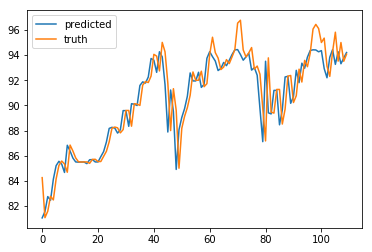

In [182]:
y_pred = fitted.best_estimator_.predict(test_X)

plt.plot(y_pred, label='predicted')
plt.plot(test_Y, label='truth')
plt.legend()